<a href="https://colab.research.google.com/github/alangkim/fchollet/blob/main/%EB%94%A5%EB%9F%AC%EB%8B%9D_%EC%A4%91%EA%B0%84%EA%B3%A0%EC%82%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ch4. The mathematical building blocks of neural networks

## import

In [ ]:
import tensorflow as tf

from tensorflow import keras

from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers
from tensorflow.keras import losses
from tensorflow.keras import metrics
from tensorflow.keras import regularizers
from tensorflow.keras.utils import to_categorical

import numpy as np
import matplotlib.pyplot as plt
import copy
import os

## MNIST 분류하기

11501568/11490434 [==============================] - 0s 0us/step


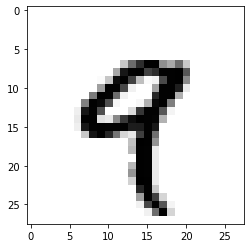

Epoch 1/5
469/469 [==============================] - 9s 6ms/step - loss: 0.2551 - accuracy: 0.9259
Epoch 2/5
469/469 [==============================] - 3s 6ms/step - loss: 0.1034 - accuracy: 0.9693
Epoch 3/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0690 - accuracy: 0.9786
Epoch 4/5
469/469 [==============================] - 3s 7ms/step - loss: 0.0497 - accuracy: 0.9850
Epoch 5/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0376 - accuracy: 0.9886
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 512)               401920    
                                                                 
 dense_3 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_______________

In [ ]:
# mnist 불러오기
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# .shpae, len() 등으로 데이터의 구조를 파악할 수 있다.


# 그림 불러오기
a = train_images[4]
plt.imshow(a, cmap = plt.cm.binary)
plt.show()

# data
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype('float32') / 255

# model 만드는 방법 1
model = keras.Sequential()
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(10, activation = 'softmax'))

# model 만드는 방법 2
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

# compile
model.compile(optimizer = 'rmsprop',
              loss = 'sparse_categorical_crossentropy',
              metrics = 'accuracy')

# fit
model.fit(train_images,
          train_labels,
          epochs = 5,
          batch_size = 128)


# model summary
model.summary()

# prediction
test_digits = test_images[:10]
predictions = model.predict(test_digits)
print(
predictions[0],
predictions[0].argmax(),
predictions[0][7],
test_labels[0],
sep = '\n'
)

# evaluation
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")

## 텐서 만들기

In [ ]:
#np.array()로 만들고 .ndim .shape .dtype 으로 텐서 구조 확인
#np.array() : 리스트, 튜플 등을 넘파이 배열로 만들어준다.

a = np.array(1)

b = np.array([1, 2, 3])

c = np.array([[1, 2], 
              [3, 4]])

d = np.array([[[1, 2],
               [3, 4]],
              [[1, 2],
               [4, 5]],
              [[3, 4],
               [5, 6]]])

#print(a, b, c, d, sep = '\n')

#print(d.ndim, d.shape, d.dtype)

my_slice = d[0:1, :, :]

print(my_slice)

[[[1 2]
  [3 4]]]


## 넘파이로 텐서 조작하기

In [ ]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print(
train_images.ndim,
train_images.shape,
sep = '\n'
)

my_slice = train_images[10:100]
my_slice = train_images[10:100, :, :]
my_slice = train_images[10:100, 0:28, 0:28]

3
(60000, 28, 28)


# 3. Introduction to Keras and Tensorflow

## 텐서플로우 계산

In [ ]:
# tf.ones
x_tf = tf.ones(shape = (2, 1)) # shape= 생략 가능
x_np = np.ones(shape = (2, 1))
print(x_tf, x_np)


# tf.zeros
y_tf = tf.zeros(shape = (2, 1))
y_np = np.zeros(shape = (2, 1))
print(y_tf, y_np)


#tf.random
z_tf = tf.random.normal(shape = (3, 1), mean = 0., stddev = 1.)
z_np = np.random.normal(size = (3, 1), loc = 0., scale = 1.)
print(z_tf, z_np)


#tf.uniform
w_tf = tf.random.uniform(shape = (3, 1), minval = 0., maxval = 1.)
w_np = np.random.uniform(size = (3, 1), low = 0., high = 1.)
print(w_tf, w_np)


# Tensorflow tensors aren't assignable
x = np.ones(shape = (2, 2))
print(x)

x[0, 0] = 0
print(x)
#텐서플로우 텐서는 바꾸려고 하면 오류 발생 'tensorflow.python.framework.ops.EagerTensor' object does not support item assignment


#tf.Variable
#is the class meant to manage modifiable state in Tensorflow
v = tf.Variable(initial_value = tf.random.normal(shape = (3, 1)))
print(v)

#assign
v.assign(tf.ones((3,1)))
print(v)

v[0, 0].assign(3.)
print(v)

#assign_add, assign_sub
#are equivalients of += and -=
v.assign_add(tf.ones((3, 1)))
print(v)

v.assign_sub(tf.ones((3,1)))
print(v)

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32) [[1.]
 [1.]]
tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32) [[0.]
 [0.]]
tf.Tensor(
[[1.223554  ]
 [0.19278012]
 [0.8392564 ]], shape=(3, 1), dtype=float32) [[-0.13592398]
 [-0.48190566]
 [ 0.66492627]]
tf.Tensor(
[[0.2997396 ]
 [0.31414294]
 [0.7965541 ]], shape=(3, 1), dtype=float32) [[0.03703838]
 [0.43954278]
 [0.42991179]]
[[1. 1.]
 [1. 1.]]
[[0. 1.]
 [1. 1.]]
<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[ 0.56176317],
       [-0.34014943],
       [ 2.2744358 ]], dtype=float32)>
<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>
<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>
<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[4.],
       [2.],
       [2.]], dtype=float32)>
<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[3.],
  

In [ ]:
# basic math operations

a = tf.constant([[1., 2.],[3., 4.]])

b = tf.square(a)
print(b)

c = tf.sqrt(a)
print(c)

d = b + c
print(d)

e = tf.matmul(a, b) # Take a product of two tensors
print(e)

a *= b # multiply two tensors elementwise
print(a)


tf.Tensor(
[[ 1.  4.]
 [ 9. 16.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[1.        1.4142137]
 [1.7320509 2.       ]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[ 2.         5.4142137]
 [10.732051  18.       ]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[19. 36.]
 [39. 76.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[ 1.  8.]
 [27. 64.]], shape=(2, 2), dtype=float32)


In [ ]:
#gradient tape on variable

input_var = tf.Variable(initial_value = 3.)
with tf.GradientTape() as tape:
    result = tf.square(input_var) # y = x**2
gradient = tape.gradient(result, input_var) # gradient of 'result' with 'input_var'
#gradient = tape.gradient(loss, weights)
print(gradient)

tf.Tensor(6.0, shape=(), dtype=float32)


In [ ]:
#gradient tape on constant

# Only trainable variables are tracked by default. With a constant tensor, you'd have to manually mark it as being tracked by calling tape.wathh() on it.
input_const = tf.constant(3.)
with tf.GradientTape() as tape:
    tape.watch(input_const)
    result = tf.square(input_const)
gradient = tape.gradient(result, input_const)
print(gradient)

# 즉, gradient tape에서 variable이 아닌 constant를 계산하고싶다면 tape.watch()를 넣어줘야한다.

tf.Tensor(6.0, shape=(), dtype=float32)


## An end to end example: A linear classifier in pure Tensorflow

In [ ]:
# 데이터 만들기
# Two classes of points in a 2D plane.

num_samples_per_class = 1000

negative_samples = np.random.multivariate_normal(mean = [0, 3], #평균좌표(0,3)
                                                 cov = [[1, 0.5], [0.5, 1]],
                                                 size = num_samples_per_class)

positive_samples = np.random.multivariate_normal(mean = [3, 0], #평균좌표(3, 0)
                                                 cov = [[1, 0.5], [0.5, 1]],
                                                 size = num_samples_per_class)

# np.random.multivariate_normal : 다변량 정규분포에서 랜덤표본 추출

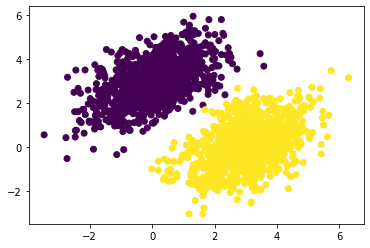

In [ ]:
# 데이터 정리

inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)
#vstack = vertical stack

targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype = "float32"),
                     np.ones((num_samples_per_class, 1), dtype = "float32")))

plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

# inputs의 전체 행의 1열을 x좌표, 전체 행의 2열을 y좌표로 하는 scatter plot을 그리는데, targets 전체 행의 열을 기준으로 다른 숫자의 색은 다른 색으로 칠해라.

In [ ]:
# Create a linear classification

inputs_dim = 2 # x좌표, y좌표 2개
output_dim = 1 # 0에서 1사이의 확률. 0에 가까우면 negative, 1에 가까우면 positive로 판단.
W = tf.Variable(initial_value = tf.random.uniform(shape=(inputs_dim, output_dim)))
b = tf.Variable(initial_value = tf.zeros(shape = output_dim,))


# [w1, w2] [x, y] + b   

In [ ]:
#model
def model(inputs):
    return tf.matmul(inputs, W) + b #loss function


#loss
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions) # loss function
    return tf.reduce_mean(per_sample_losses) # loss의 평균을 반환

# tf.reduce_mean(x) : x 행렬 전체의 평균을 반환
# tf.reduce_mean(x, 0) : x 행렬의 열 평균을 반환
# tf.reduce_mean(x, 1) : x 행렬의 행 평균을 반환


# training with gradient tape
learning_rate = 0.1
def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs) # model
        loss = square_loss(targets, predictions) # loss function
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b]) # wrt : with respect to
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

In [ ]:
# train

for step in range(40):
    loss = training_step(inputs, targets)
    print(f"Loss at step {step}: {loss:.4f}") # :.4f 실수 소수점 아래 자리 수 제한

Loss at step 0: 0.9651
Loss at step 1: 0.2305
Loss at step 2: 0.1187
Loss at step 3: 0.0972
Loss at step 4: 0.0893
Loss at step 5: 0.0837
Loss at step 6: 0.0788
Loss at step 7: 0.0744
Loss at step 8: 0.0703
Loss at step 9: 0.0666
Loss at step 10: 0.0632
Loss at step 11: 0.0600
Loss at step 12: 0.0571
Loss at step 13: 0.0545
Loss at step 14: 0.0521
Loss at step 15: 0.0499
Loss at step 16: 0.0478
Loss at step 17: 0.0460
Loss at step 18: 0.0443
Loss at step 19: 0.0427
Loss at step 20: 0.0413
Loss at step 21: 0.0399
Loss at step 22: 0.0387
Loss at step 23: 0.0376
Loss at step 24: 0.0366
Loss at step 25: 0.0357
Loss at step 26: 0.0348
Loss at step 27: 0.0340
Loss at step 28: 0.0333
Loss at step 29: 0.0327
Loss at step 30: 0.0320
Loss at step 31: 0.0315
Loss at step 32: 0.0310
Loss at step 33: 0.0305
Loss at step 34: 0.0301
Loss at step 35: 0.0297
Loss at step 36: 0.0293
Loss at step 37: 0.0290
Loss at step 38: 0.0287
Loss at step 39: 0.0284


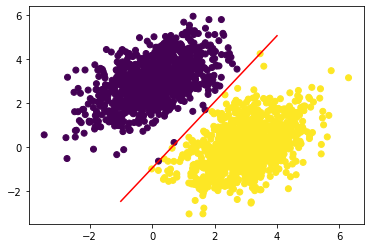

In [ ]:
# predict

predictions = model(inputs)

x = np.linspace(-1, 4, 100)
y = - W[0] /  W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, "-r")  # 왜 r이 아니라 -r인가?
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)

#np.linspace(구간시작점, 구간끝점, 구간내숫자개수)

#### input
In Keras, layers automatically inferred their input shape as being the shape of the first inputs they see.


#### loss function
two class classification : binary crossentropy

many class classification : categorical crossentropy

regression : mean squared error


#### comlile step
key arguments:

1. Loss function

2. Optimizer

3. Metrics

#### fit() method
key arguments:

1. The data to train on

2. The number of epochs to train for

3. The bath size to use within each epoch of mini-batch gradient descent

In [ ]:
layer = layers.Dense(32, activation = 'relu')

model = models.Sequential([
    layers.Dense(32, activation = 'relu'),
    layers.Dense(32)
])

# Ch4. Getting Started with Neural Networks

## 1. Classifying movie reviews: a binary classification example

### IMDB dataset

In [ ]:
imdb.load_data?

Object `imdb.load_data` not found.


In [ ]:
#data

from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)

#num_words = 10000 : only keep the top 10,000 most frequently occurring words in the training data

17473536/17464789 [==============================] - 0s 0us/step


In [ ]:
#decoding

word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])
print(decoded_review)


# .get() : 딕셔너리의 키를 넣어주면 키 값을 반환해주고 해당 키가 존재하지 않으면 두 번째 인자를 반환.


#cf)
[i*2 for i in range(3)]
" ".join(["Hi", "good", "morning"])

1654784/1641221 [==============================] - 0s 0us/step
? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amaz

'Hi good morning'

In [ ]:
# preparing data(multi hot encoding)
# input shape of data shold be the same. so we need to do encoding

def vectorize_sequences(sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
    
# enumerate() : 반복문 사용시 몇번째 반복문인지 확인 가능.
    
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")
        
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

### model

In [ ]:
model = keras.Sequential([
    layers.Dense(16, activation = "relu"),
    layers.Dense(16, activation = "relu"),
    layers.Dense(1, activation = "sigmoid")
])    

# relu : max(0, x)
# sigmoid : -무한대는 0 무한대는 1의 값을 가짐. 
# for binary classification, we use sigmoid with single dense output layer
"""
if we use Dense layer with output 2, natural extension should be
model = models.Sequential()
model.add(layers.Dense(16, activation = "relu", input_shape=(10000,)))
model.add(layers.Dense(16, activation = "relu"))
model.add(layers.Dense(2, activation = "softmax"))
softmax is natural extension of sigmoid

"""

'\nif we use Dense layer with output 2, natural extension should be\nmodel = models.Sequential()\nmodel.add(layers.Dense(16, activation = "relu", input_shape=(10000,)))\nmodel.add(layers.Dense(16, activation = "relu"))\nmodel.add(layers.Dense(2, activation = "softmax"))\nsoftmax is natural extension of sigmoid\n\n'

### compile

In [ ]:
model.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

### fit

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 45ms/step - loss: 0.5375 - accuracy: 0.7679 - val_loss: 0.4188 - val_accuracy: 0.8424
Epoch 2/20
30/30 [==============================] - 1s 21ms/step - loss: 0.3277 - accuracy: 0.8994 - val_loss: 0.3150 - val_accuracy: 0.8882
Epoch 3/20
30/30 [==============================] - 1s 21ms/step - loss: 0.2393 - accuracy: 0.9261 - val_loss: 0.2886 - val_accuracy: 0.8894
Epoch 4/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1849 - accuracy: 0.9433 - val_loss: 0.2834 - val_accuracy: 0.8880
Epoch 5/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1518 - accuracy: 0.9549 - val_loss: 0.2793 - val_accuracy: 0.8889
Epoch 6/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1251 - accuracy: 0.9625 - val_loss: 0.2892 - val_accuracy: 0.8856
Epoch 7/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1005 - accuracy: 0.9716 - val_loss: 0.3038 - val_accuracy: 0.8837
Epoch 8/20
30

### loss와 accuracy의 관찰

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


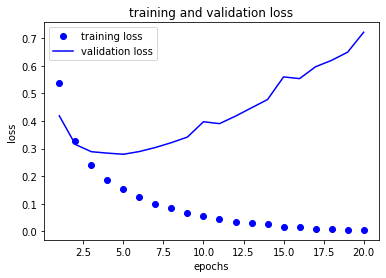

In [ ]:
history_dict = history.history
print(history_dict.keys())

loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, "bo", label = "training loss") # bo : blue circle
plt.plot(epochs, val_loss_values, "b", label = "validation loss")

plt.title("training and validation loss")
plt.xlabel("epochs")
plt.ylabel("loss")

plt.legend()
plt.show()

#### loss 그래프 해석

training loss는 계속 줄어들지만 validation loss는 어느순간부터 증가하기 시작한다.

epoch 4 이후에는 overfitting이 되었다는 의미

overfitting : after the epoch4, you're overoptimizing on the training data

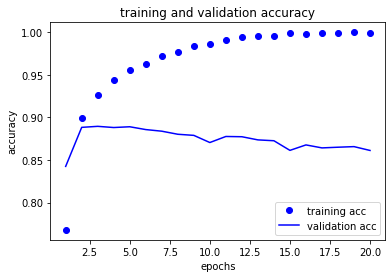

In [ ]:
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]

plt.plot(epochs, acc, "bo", label = "training acc")
plt.plot(epochs, val_acc, "b", label = "validation acc")

plt.title("training and validation accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")

plt.legend()
plt.show()

#### accuracy 그래프 해석

epoch 4 이후에 validation accuracy가 감소한다. overfitting이 되었다는 의미

#### 모델 수정

In [ ]:
# epochs를 4로 제한한 모델

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

model.fit(x_train, y_train, epochs=4, batch_size=512)

Epoch 1/4
49/49 [==============================] - 1s 13ms/step - loss: 0.4549 - accuracy: 0.8156
Epoch 2/4
49/49 [==============================] - 1s 13ms/step - loss: 0.2574 - accuracy: 0.9094
Epoch 3/4
49/49 [==============================] - 1s 14ms/step - loss: 0.1970 - accuracy: 0.9299
Epoch 4/4
49/49 [==============================] - 1s 14ms/step - loss: 0.1683 - accuracy: 0.9402


In [ ]:
results = model.evaluate(x_test, y_test)

# loss : test loss : 0.29
# accuracy : test accuracy : 0.88

782/782 [==============================] - 3s 3ms/step - loss: 0.2956 - accuracy: 0.8826


In [ ]:
model.predict(x_test)

array([[0.16625142],
       [0.9995722 ],
       [0.9344622 ],
       ...,
       [0.09212752],
       [0.0510609 ],
       [0.5386385 ]], dtype=float32)

# 2. Classifying newswires: a multiclass classification example

### reuters dataset

In [ ]:
# data

from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words = 10000)

2121728/2110848 [==============================] - 0s 0us/step


In [ ]:
# decoding

word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join([reverse_word_index.get(i-3, "?") for i in train_data[0]])

print(decoded_newswire)

565248/550378 [==============================] - 0s 0us/step
? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


In [ ]:
#encoding

#멀티-핫 인코딩
def vectorize_sequences(sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)


#원-핫 인코딩
def to_one_hot(labels, dimension=46): # 뉴스주제가 46가지
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)


#케라스에 구현되어있는 원-핫 인코딩
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)


#vailidation data 나누기
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]


#원-핫 인코딩 대신 사용할 수 있는 방법
y_train = np.array(train_labels)
y_test = np.array(test_labels)

model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
#그냥 integer 텐서로 남겨두는 대신 loss function을 categorical_crossentropy에서 sparse_categorical_crossentropy로 바꿔야한다.

### model

In [ ]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

# we use softmax function for multi-class classification

### compile

In [ ]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

### fit

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 28ms/step - loss: 2.6279 - accuracy: 0.5432 - val_loss: 1.7250 - val_accuracy: 0.6500
Epoch 2/20
16/16 [==============================] - 0s 17ms/step - loss: 1.4094 - accuracy: 0.7076 - val_loss: 1.2975 - val_accuracy: 0.7120
Epoch 3/20
16/16 [==============================] - 0s 18ms/step - loss: 1.0395 - accuracy: 0.7714 - val_loss: 1.1186 - val_accuracy: 0.7560
Epoch 4/20
16/16 [==============================] - 0s 17ms/step - loss: 0.8236 - accuracy: 0.8224 - val_loss: 1.0218 - val_accuracy: 0.7680
Epoch 5/20
16/16 [==============================] - 0s 17ms/step - loss: 0.6592 - accuracy: 0.8577 - val_loss: 0.9496 - val_accuracy: 0.7880
Epoch 6/20
16/16 [==============================] - 0s 17ms/step - loss: 0.5263 - accuracy: 0.8935 - val_loss: 0.9276 - val_accuracy: 0.8050
Epoch 7/20
16/16 [==============================] - 0s 17ms/step - loss: 0.4262 - accuracy: 0.9128 - val_loss: 0.9030 - val_accuracy: 0.7980
Epoch 8/20
16

### loss와 accuracy의 관찰

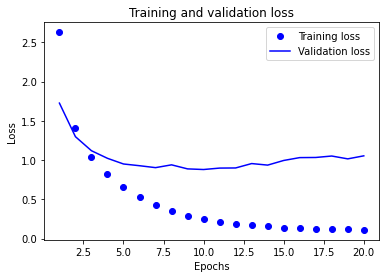

In [ ]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

#### loss 그래프 해석

9 epoch 이후에 overfitting이 시작된다.

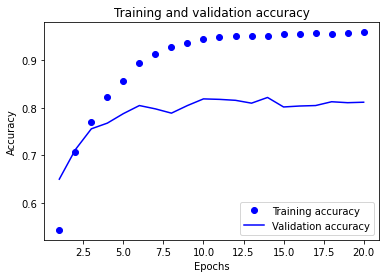

In [ ]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### 모델 수정

In [ ]:
# epochs를 9로 제한한 모델
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=9,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/9
16/16 [==============================] - 1s 31ms/step - loss: 2.7115 - accuracy: 0.5208 - val_loss: 1.7732 - val_accuracy: 0.6420
Epoch 2/9
16/16 [==============================] - 0s 19ms/step - loss: 1.4427 - accuracy: 0.6998 - val_loss: 1.3264 - val_accuracy: 0.6960
Epoch 3/9
16/16 [==============================] - 0s 20ms/step - loss: 1.0692 - accuracy: 0.7694 - val_loss: 1.1427 - val_accuracy: 0.7540
Epoch 4/9
16/16 [==============================] - 0s 19ms/step - loss: 0.8460 - accuracy: 0.8201 - val_loss: 1.0297 - val_accuracy: 0.7780
Epoch 5/9
16/16 [==============================] - 0s 17ms/step - loss: 0.6750 - accuracy: 0.8559 - val_loss: 0.9498 - val_accuracy: 0.7930
Epoch 6/9
16/16 [==============================] - 0s 20ms/step - loss: 0.5365 - accuracy: 0.8893 - val_loss: 0.9039 - val_accuracy: 0.8140
Epoch 7/9
16/16 [==============================] - 0s 17ms/step - loss: 0.4322 - accuracy: 0.9090 - val_loss: 0.8701 - val_accuracy: 0.8180
Epoch 8/9
16/16 [===

In [ ]:
results = model.evaluate(x_test, y_test)

ValueError: ignored

In [ ]:
results

In [ ]:
#results from random guess
#모델의 수치가 좋은지 알아보려면 random guess와 비교해봐야한다.

test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
hits_array.mean()

# random classifier의 확률은 19%, 우리 모델은 78%

0.19412288512911843

In [ ]:
predictions = model.predict(x_test)

In [ ]:
np.argmax(predictions[0])

3

## 3. Predicting house prices: a regression example

### The Boston housing price dataset

In [ ]:
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

65536/57026 [==================================] - 0s 0us/step


In [ ]:
# Normalizing the data

mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

#mean을 빼고 std로 나눠서 normalize

#### why we normalize?

Gradient of larger parameter dominates the update.

In normalize state, both parameters can be updated in equal proportions

### model

In [ ]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(1)
    ])
    model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
    return model

# In regression problem, we don't need activation. So output is Dense1 without activation.
# In regression proble, we use loss function as MSE

### validation

In [ ]:
k = 4 #4-fold validation을 사용

num_val_samples = len(train_data) // k
num_epochs = 500
all_scores = [] # validation score 저장
all_mae_histories = []


for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    
    
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    
    
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    
    
    model = build_model()
    
    
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=16, verbose=0)
    #verbose=0 : training history를 생략함.
    
    
    mae_history = history.history["val_mae"]
    all_mae_histories.append(mae_history)
    # save the per epoch validation score log for eash fold
    # 4-fold, epochs=500 이므로 4개의 리스트 안에 500개씩 값이 저장되어있다.
    
    
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


In [ ]:
all_scores

[2.3776612281799316, 2.6985065937042236, 2.8093421459198, 2.3064186573028564]

In [ ]:
np.mean(all_scores)
#4-fold cross-validation mae

2.547982156276703

In [ ]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

In [ ]:
average_mae_history

[19.20121192932129,
 15.52596378326416,
 11.173136234283447,
 7.790324091911316,
 5.829473972320557,
 4.747176289558411,
 4.083718478679657,
 3.6783644556999207,
 3.397306442260742,
 3.313815474510193,
 3.191123366355896,
 3.094294309616089,
 3.039156436920166,
 2.9557955265045166,
 2.8957177996635437,
 2.8172261118888855,
 2.729818046092987,
 2.7288809418678284,
 2.702553629875183,
 2.7083972096443176,
 2.680286407470703,
 2.6025373339653015,
 2.576624572277069,
 2.5049808621406555,
 2.5215683579444885,
 2.4945849776268005,
 2.510852098464966,
 2.531791925430298,
 2.5401936173439026,
 2.4781014919281006,
 2.488138794898987,
 2.4667872190475464,
 2.412149727344513,
 2.431893050670624,
 2.4680256843566895,
 2.3840168714523315,
 2.4266037344932556,
 2.4836347699165344,
 2.395408272743225,
 2.396501123905182,
 2.3742863535881042,
 2.4580076932907104,
 2.4295494556427,
 2.3627399504184723,
 2.3529610633850098,
 2.382555663585663,
 2.392361104488373,
 2.395753502845764,
 2.4249977469444275,

### validationMAE의 관찰

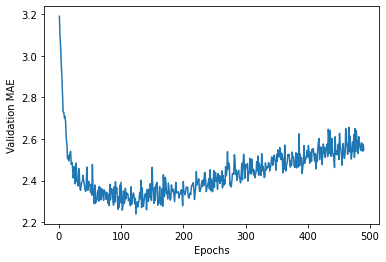

In [ ]:
truncated_mae_history = average_mae_history[10:]
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

# scaling issue때문에 값을 관찰할 수 없어서 처음 10개의 데이터 생략
# validation MAE stops improving significantly after 120-140 epochs

### 모델 수정

In [ ]:
model = build_model()
model.fit(train_data, train_targets,
          epochs=130, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 4ms/step - loss: 13.5801 - mae: 2.4216


In [ ]:
test_mae_score

2.4216158390045166

In [ ]:
predictions = model.predict(test_data)
predictions[0]

array([7.749985], dtype=float32)

In [ ]:
test_targets[0]

7.2

# Ch5. Fundamentals of Machine Learning

#### Optimization

Refers to the process of adjusting a model to get the best performance possible on the training data

#### Generalization
Refers to how well the trained model performs on data it has never seen before

#### Regulaization
The processing of fighting overfitting

## Suspicious correlations

### mnist에 white noise channels, all zeros channels 추가하기

In [ ]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)
#train_images와 같은 shape의 noise를 삽입

train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

# np.concatenate : 넘파이 배열을 하나로 합쳐주는 함수
# axis=0 : 2차원의 경우 행에 대해 결합이 이뤄짐(세로로 쌓임)
# axis=1 : 2차원의 경우 열에 대해 결합이 이뤄짐(가로로 쌓임)

11501568/11490434 [==============================] - 0s 0us/step


### model, fit

In [ ]:
def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

# training noise dataset 
model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

# training zeros dataset
model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

# training only train dataset(original data)
model = get_model()
history = model.fit(
    train_images, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 2s 4ms/step - loss: 0.6315 - accuracy: 0.8103 - val_loss: 0.3330 - val_accuracy: 0.8980
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 0.2575 - accuracy: 0.9210 - val_loss: 0.2106 - val_accuracy: 0.9357
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1663 - accuracy: 0.9483 - val_loss: 0.1455 - val_accuracy: 0.9572
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1196 - accuracy: 0.9627 - val_loss: 0.1257 - val_accuracy: 0.9627
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0888 - accuracy: 0.9726 - val_loss: 0.1193 - val_accuracy: 0.9657
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0654 - accuracy: 0.9793 - val_loss: 0.1330 - val_accuracy: 0.9612
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0496 - accuracy: 0.9841 - val_loss: 0.1273 - val_accuracy: 0.9640
Epoch 

### noise와 zeros channel의 validation accuracy 관찰하기

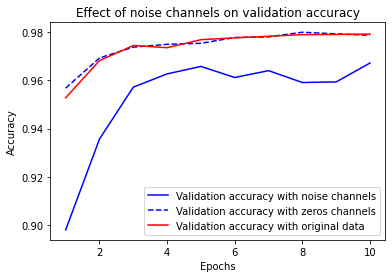

In [ ]:
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
val_acc_train = history.history["val_accuracy"]

epochs = range(1, 11)

plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.plot(epochs, val_acc_train, "r-",
         label="Validation accuracy with original data")

plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

* zeros에 비해 noise의 validation_accuracy가 좋지 않다. suspicious correlation이 발생

* noise channels가 overfittng 되었다는 의미.

* zeros와 original data의 결과는 거의 같다.

* Noisy features inevitably lead to overfitting. As such, in cases where you aren't sure whether the features you have are informative for distracting, it's common to do feature selection before training

## The nature of generalization in deep learning

A remarkable fact about deep learning models is that they can be trained to fit anything, as long as they have enough representational power

In [ ]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, random_train_labels,
          epochs=100,
          batch_size=128,
          validation_split=0.2)

Epoch 1/100
375/375 [==============================] - 2s 5ms/step - loss: 2.3163 - accuracy: 0.1041 - val_loss: 2.3059 - val_accuracy: 0.1026
Epoch 2/100
375/375 [==============================] - 2s 4ms/step - loss: 2.3003 - accuracy: 0.1163 - val_loss: 2.3117 - val_accuracy: 0.1042
Epoch 3/100
375/375 [==============================] - 2s 4ms/step - loss: 2.2911 - accuracy: 0.1287 - val_loss: 2.3192 - val_accuracy: 0.1058
Epoch 4/100
375/375 [==============================] - 2s 4ms/step - loss: 2.2772 - accuracy: 0.1416 - val_loss: 2.3277 - val_accuracy: 0.1007
Epoch 5/100
375/375 [==============================] - 2s 4ms/step - loss: 2.2596 - accuracy: 0.1564 - val_loss: 2.3406 - val_accuracy: 0.0967
Epoch 6/100
375/375 [==============================] - 2s 4ms/step - loss: 2.2390 - accuracy: 0.1694 - val_loss: 2.3524 - val_accuracy: 0.0977
Epoch 7/100
375/375 [==============================] - 2s 4ms/step - loss: 2.2150 - accuracy: 0.1817 - val_loss: 2.3619 - val_accuracy: 0.0988

Even though there is no relationship whatsover between the inputs and the shuffled labels, the training loss goes down just fine.

Naturally, the validation loss does not improve at all over time

In this case, your model fitting something but validation accuracy does not improve very well.

val_accuracy는 random walk를 따르지만 accuracy는 epoch을 거듭할수록 계속 올라감.

## The maniford hypothesis

Actual handwritten digits only occupy a tiny subspace of the parent space of all possible 28*28 unit8 array

All samples in the valid subspace are connected by smooth paths that run through the subspace.

Manifold : 고차원 공간에서 휘어지거나 뒤틀린 2D 모양의 데이터셋

Manifold hypothesis : 

* 높은 차원에 존재하는 데이터들의 경우, 실제로는 해당 데이터들을 아우르는 낮은 차원의 다양체 역시 존재한다는 가설

* All natural data lies on a low-dimensional manifold within the high-dimensional space where it is encoded.

The manifold hypothesis implies that :

* Machine learning models only have to fit relatively simple, low-dimensional,
highly structured subspaces within their potential input space (latent manifolds).
* Within one of these manifolds, it’s always possible to interpolate between two
inputs, that is to say, morph one into another via a continuous path along which
all points fall on the manifold.

## Interpolation as a source of generalization

Deep learning achieves generalization via interpolation(보간법) on a learned approximation of the data manifold

## Why deep learning works

A sheet of paper represents a 2D manifold within 3D space.

A deep learning model is a tool for uncrumpling paper balls, that is, for disentangling latent manifolds.

## Training data is paramount

Deep learning is curve fitting, for a model to perform well it needs to be trained on a dense sampling of its input space

Sparse sampling이 아니라 Dense sampling이 필요하다

## Evaluating machine-learning models

Goal is to achieve models that generalize

It's essential to be able to reliably measure the generalization power of your model

## Training, validation, and test sets

Tuning parameters and hyperparameters is a from of learning

* A model parameter is a configuration variable that is internal to the model and whose value can be estimated from data.

* A model hyperparameter is a configuration that is external to the model and whose value cannot be estimated from data.

Tuning is based on its performance on validation set

Tuning a lot would cuase information leak

Thus, you need never-before-seen test dataset


## Hold-out validation

In [ ]:
data = np.random.random(size = [20000])


num_validation_data = 10000

np.random.shuffle(data)

training_data = data[num_validation_data:]

validtaion_data = data[:num_validation_data]

10000 10000


## K fold validation

## Iterated(반복하다) K fold validation

* Applying K-fold validation multiple times, shuffling the data every time before splitting it K-ways

In [ ]:
# K fold validation

"""

k = 3

num_validation_samples = len(data) // k

np.random.shuffle(data)

validation_scores = []

for fold in range(k):
    validation_data = data[num_validation_samples * fold:
                           num_validation_samples * (fold + 1)]
    
    training_data = np.concatenate(
        data[:num_validation_samples * fold],
        data[num_validation_samples * (fold + 1):])
    
    model = get_model()
    
    model.fit(training_data, ...) # train data
    
    validation_score = model.evaluate(validation_data, ...)
    validation_scores.append(validation_score)
    
validation_score = np.average(validation_scores)

model = get_model()
model.fit(data, ...) # test data
test_score = model.evaluate(test_data, ...)

"""

'\n\nk = 3\n\nnum_validation_samples = len(data) // k\n\nnp.random.shuffle(data)\n\nvalidation_scores = []\n\nfor fold in range(k):\n    validation_data = data[num_validation_samples * fold:\n                           num_validation_samples * (fold + 1)]\n    \n    training_data = np.concatenate(\n        data[:num_validation_samples * fold],\n        data[num_validation_samples * (fold + 1):])\n    \n    model = get_model()\n    \n    model.fit(training_data, ...) # train data\n    \n    validation_score = model.evaluate(validation_data, ...)\n    validation_scores.append(validation_score)\n    \nvalidation_score = np.average(validation_scores)\n\nmodel = get_model()\nmodel.fit(data, ...) # test data\ntest_score = model.evaluate(test_data, ...)\n\n'

## Things to keep in mind

Data representativeness
* Randomly shuffle data before splitting it

The arrow of time
* If you are predicting future event, don't shuffle. Use future data as test set

Redundancy in your data
* Remove redundant data before the start

## Improving model fit

To achieve the perfect fit, you must first overfit. Since you don't know in advance where the boundary lies, you must cross it to find it.

Once you have such a model, you'll focus on refining generalization by fighting overfitting.

Three common problems:
* 1) training loss doesn’t go down.
* 2) model doesn’t meaningfully generalize.(It means training loss is going down but validation accuracy doesn't going down)
* 3) training and validation loss both go down but model still underfitting.

## Tuning key gradient descent parameters

* Sometimes training doesn't get started

* When this happens, it’s always a problem with the configuration of the gradient descent process

* Training accuracy가 나아지지 않는다면 (model이 아무것도 improve하지 못한다면) gradient descent parameter를 수정해보거나 batch size를 증가시킬 것

In [ ]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

In [ ]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1.), # learning rate가 너무 높음
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

# lr이 너무 높으면 어떠한 accuracy도 나아지지 않는다.

Epoch 1/10
375/375 [==============================] - 2s 5ms/step - loss: 858.6198 - accuracy: 0.4302 - val_loss: 2.0945 - val_accuracy: 0.3064
Epoch 2/10
375/375 [==============================] - 2s 4ms/step - loss: 6.0507 - accuracy: 0.3031 - val_loss: 2.2000 - val_accuracy: 0.3186
Epoch 3/10
375/375 [==============================] - 2s 4ms/step - loss: 4.9113 - accuracy: 0.3033 - val_loss: 2.5934 - val_accuracy: 0.3333
Epoch 4/10
375/375 [==============================] - 2s 4ms/step - loss: 2.9968 - accuracy: 0.2844 - val_loss: 3.2320 - val_accuracy: 0.4285
Epoch 5/10
375/375 [==============================] - 2s 4ms/step - loss: 3.0285 - accuracy: 0.3333 - val_loss: 2.2080 - val_accuracy: 0.3597
Epoch 6/10
375/375 [==============================] - 2s 5ms/step - loss: 2.6800 - accuracy: 0.2965 - val_loss: 2.0003 - val_accuracy: 0.2966
Epoch 7/10
375/375 [==============================] - 2s 4ms/step - loss: 2.7519 - accuracy: 0.2923 - val_loss: 1.9869 - val_accuracy: 0.2611
Epoc

In [ ]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2), # 적절한 수준의  learning rate
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

# 단, lr이 너무 작으면 minimum validation loss에 도달할 수 없다.

Epoch 1/10
375/375 [==============================] - 2s 5ms/step - loss: 0.3853 - accuracy: 0.9108 - val_loss: 0.1917 - val_accuracy: 0.9503
Epoch 2/10
375/375 [==============================] - 2s 4ms/step - loss: 0.1406 - accuracy: 0.9641 - val_loss: 0.1597 - val_accuracy: 0.9664
Epoch 3/10
375/375 [==============================] - 2s 4ms/step - loss: 0.1168 - accuracy: 0.9729 - val_loss: 0.1838 - val_accuracy: 0.9675
Epoch 4/10
375/375 [==============================] - 2s 4ms/step - loss: 0.1006 - accuracy: 0.9785 - val_loss: 0.2363 - val_accuracy: 0.9613
Epoch 5/10
375/375 [==============================] - 2s 4ms/step - loss: 0.0838 - accuracy: 0.9822 - val_loss: 0.1951 - val_accuracy: 0.9729
Epoch 6/10
375/375 [==============================] - 2s 4ms/step - loss: 0.0733 - accuracy: 0.9850 - val_loss: 0.2406 - val_accuracy: 0.9702
Epoch 7/10
375/375 [==============================] - 2s 4ms/step - loss: 0.0699 - accuracy: 0.9870 - val_loss: 0.2983 - val_accuracy: 0.9701
Epoch 

## Leveraging better architecture priors

Model trains but doesn’t generalize. What’s going on?
* input data you’re using simply doesn’t contain sufficient information to predict your targets
* The kind of model you’re using is not suited for the problem

## Increasing model capacity
If you manage to get to a model that fits, you need to get your model to start overfitting.

In [ ]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

In [ ]:
# only 1 layer

model = keras.Sequential([layers.Dense(10, activation="softmax")])

model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

history_small_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

# deeplearning model with 1 simple dense layer with softmax activation is same as the logistic regression

Epoch 1/20
375/375 [==============================] - 2s 4ms/step - loss: 0.6658 - accuracy: 0.8365 - val_loss: 0.3601 - val_accuracy: 0.9043
Epoch 2/20
375/375 [==============================] - 1s 4ms/step - loss: 0.3514 - accuracy: 0.9038 - val_loss: 0.3082 - val_accuracy: 0.9133
Epoch 3/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3159 - accuracy: 0.9124 - val_loss: 0.2916 - val_accuracy: 0.9187
Epoch 4/20
375/375 [==============================] - 1s 4ms/step - loss: 0.2997 - accuracy: 0.9167 - val_loss: 0.2812 - val_accuracy: 0.9216
Epoch 5/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2900 - accuracy: 0.9191 - val_loss: 0.2786 - val_accuracy: 0.9228
Epoch 6/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2837 - accuracy: 0.9209 - val_loss: 0.2731 - val_accuracy: 0.9247
Epoch 7/20
375/375 [==============================] - 1s 4ms/step - loss: 0.2784 - accuracy: 0.9217 - val_loss: 0.2690 - val_accuracy: 0.9262
Epoch 

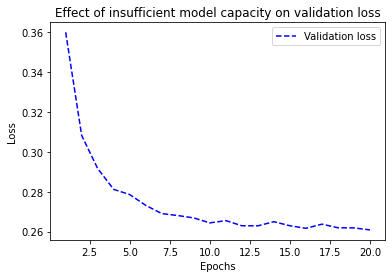

In [ ]:
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)

plt.plot(epochs, val_loss, "b--",
         label="Validation loss")

plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

모델이 너무 단순하기 때문에 epochs가 많아도

* overfitting이 나타나지 않고

* validation accuracy도 그닥 좋지 않으며

* validation loss도 크다.

더 좋은 모델을 만들 수 있다는 의미

In [ ]:
# model with 3 layers = bigger model

model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
])

model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

history_large_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 3s 5ms/step - loss: 0.3577 - accuracy: 0.8987 - val_loss: 0.1839 - val_accuracy: 0.9461
Epoch 2/20
375/375 [==============================] - 2s 4ms/step - loss: 0.1604 - accuracy: 0.9530 - val_loss: 0.1516 - val_accuracy: 0.9541
Epoch 3/20
375/375 [==============================] - 2s 4ms/step - loss: 0.1123 - accuracy: 0.9668 - val_loss: 0.1182 - val_accuracy: 0.9645
Epoch 4/20
375/375 [==============================] - 1s 4ms/step - loss: 0.0873 - accuracy: 0.9733 - val_loss: 0.1086 - val_accuracy: 0.9696
Epoch 5/20
375/375 [==============================] - 1s 4ms/step - loss: 0.0695 - accuracy: 0.9790 - val_loss: 0.0921 - val_accuracy: 0.9731
Epoch 6/20
375/375 [==============================] - 2s 4ms/step - loss: 0.0561 - accuracy: 0.9829 - val_loss: 0.0974 - val_accuracy: 0.9720
Epoch 7/20
375/375 [==============================] - 2s 4ms/step - loss: 0.0468 - accuracy: 0.9852 - val_loss: 0.0966 - val_accuracy: 0.9728
Epoch 

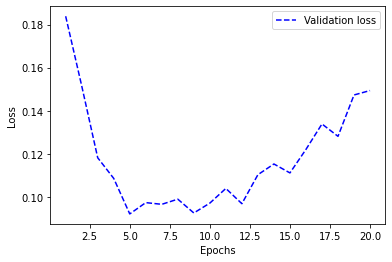

In [ ]:
val_loss = history_large_model.history["val_loss"]
epochs = range(1, 21)

plt.plot(epochs, val_loss, "b--",
         label="Validation loss")

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

small model 보다 validation loss 도 줄고 validation accuracy도 좋아졌다.

그러나 overfitting이 나타났기 때문에 overfitting과 fight해야한다.

## Improving generalization

Once your model has shown itself to have some generalization power and to be able to overfit, it’s time to switch your focus to maximizing generalization.

Dataset curation: Make sure you have enough data, Minimize labeling errors, Clean your data and deal with missing values, Feature selection, etc

## Feature engineering

Feature engineering is the process of using your own knowledge about the data to make the algorithm work better by applying hardcoded (non-learned) transformations to the data.

Good features allow you to solve problems using fewer resources

Good features let you solve a problem with far less data

## Using early stopping

In deep learning, we always use models that are vastly overparameterized.

Interrupt training long before you’ve reached the minimum possible training loss.

In Keras, it’s typical to do this with an EarlyStopping callback

## Regularizing your model

Regularization techniques are a set of best practices that actively impede the model’s ability to fit perfectly to the training data, with the goal of making the model perform better during validation.

## Reducing the network's size

The simplest way to prevent overfitting is to reduce the size of the model

In [ ]:
# Using IMDB dataset

from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

In [ ]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

train_data = vectorize_sequences(train_data)

In [ ]:
# Original model

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

history_original = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 37ms/step - loss: 0.5418 - accuracy: 0.7895 - val_loss: 0.4215 - val_accuracy: 0.8621
Epoch 2/20
30/30 [==============================] - 1s 21ms/step - loss: 0.3325 - accuracy: 0.8989 - val_loss: 0.3311 - val_accuracy: 0.8747
Epoch 3/20
30/30 [==============================] - 1s 20ms/step - loss: 0.2373 - accuracy: 0.9253 - val_loss: 0.2824 - val_accuracy: 0.8914
Epoch 4/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1863 - accuracy: 0.9389 - val_loss: 0.2952 - val_accuracy: 0.8818
Epoch 5/20
30/30 [==============================] - 1s 24ms/step - loss: 0.1524 - accuracy: 0.9513 - val_loss: 0.2825 - val_accuracy: 0.8891
Epoch 6/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1269 - accuracy: 0.9621 - val_loss: 0.2976 - val_accuracy: 0.8862
Epoch 7/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1065 - accuracy: 0.9681 - val_loss: 0.3041 - val_accuracy: 0.8861
Epoch 8/20
30

In [ ]:
# Lower capacity model

model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

history_small = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 37ms/step - loss: 0.6058 - accuracy: 0.7633 - val_loss: 0.5261 - val_accuracy: 0.8434
Epoch 2/20
30/30 [==============================] - 1s 22ms/step - loss: 0.4629 - accuracy: 0.8717 - val_loss: 0.4298 - val_accuracy: 0.8640
Epoch 3/20
30/30 [==============================] - 1s 23ms/step - loss: 0.3688 - accuracy: 0.8953 - val_loss: 0.3641 - val_accuracy: 0.8774
Epoch 4/20
30/30 [==============================] - 1s 25ms/step - loss: 0.3027 - accuracy: 0.9080 - val_loss: 0.3237 - val_accuracy: 0.8844
Epoch 5/20
30/30 [==============================] - 1s 21ms/step - loss: 0.2552 - accuracy: 0.9217 - val_loss: 0.2982 - val_accuracy: 0.8897
Epoch 6/20
30/30 [==============================] - 1s 21ms/step - loss: 0.2203 - accuracy: 0.9311 - val_loss: 0.2839 - val_accuracy: 0.8920
Epoch 7/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1927 - accuracy: 0.9403 - val_loss: 0.2773 - val_accuracy: 0.8912
Epoch 8/20
30

In [ ]:
# Higher capacity model

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

history_large = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 52ms/step - loss: 0.5448 - accuracy: 0.7527 - val_loss: 0.2926 - val_accuracy: 0.8886
Epoch 2/20
30/30 [==============================] - 1s 33ms/step - loss: 0.2606 - accuracy: 0.8975 - val_loss: 0.4315 - val_accuracy: 0.8153
Epoch 3/20
30/30 [==============================] - 1s 34ms/step - loss: 0.1514 - accuracy: 0.9418 - val_loss: 0.3050 - val_accuracy: 0.8875
Epoch 4/20
30/30 [==============================] - 1s 33ms/step - loss: 0.0880 - accuracy: 0.9689 - val_loss: 0.4086 - val_accuracy: 0.8822
Epoch 5/20
30/30 [==============================] - 1s 35ms/step - loss: 0.0926 - accuracy: 0.9779 - val_loss: 0.3666 - val_accuracy: 0.8870
Epoch 6/20
30/30 [==============================] - 1s 35ms/step - loss: 0.0054 - accuracy: 0.9992 - val_loss: 0.5301 - val_accuracy: 0.8856
Epoch 7/20
30/30 [==============================] - 1s 34ms/step - loss: 8.3314e-04 - accuracy: 0.9999 - val_loss: 0.6443 - val_accuracy: 0.8863
Epoch 8/2

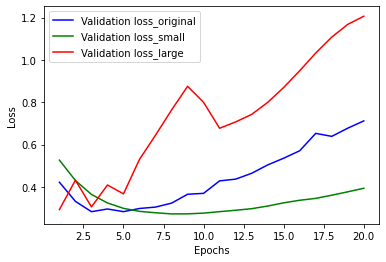

In [ ]:
val_loss_original = history_original.history["val_loss"]
val_loss_small = history_small.history["val_loss"]
val_loss_large = history_large.history["val_loss"]
epochs = range(1, 21)

plt.plot(epochs, val_loss_original, "blue",
         label="Validation loss_original")
plt.plot(epochs, val_loss_small, "green",
         label="Validation loss_small")
plt.plot(epochs, val_loss_large, "red",
         label="Validation loss_large")

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

smaller model이 original model보다 validation loss가 낮으며 overfitting이 발생하는 eopoch도 뒤에 있다. Reducing network's size를 통해 overfitting을 막고 더 좋은 model을 만들었음을 알 수 있다.

반면 larger model은 너무 빨리 overfitting이 발생하며 validation_loss도 좋지 않다.

## Adding weight regularization

Simpler models are less likely to overfit than complex ones

Simple model is a model where the parameter values has less entropy

L1 regularization : Lasso penalty

L2 regularization : Lidge penalty

L1, L2 regularization을 통해 entropy를 control할 수 있다.

Loss function안에 L1, L2규제를 삽입한다.

In [ ]:
model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l1(0.001), # l1규제의 삽입
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l1(0.001), # l1규제의 삽입
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

history_l1_reg = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 43ms/step - loss: 1.0652 - accuracy: 0.7739 - val_loss: 0.7166 - val_accuracy: 0.8212
Epoch 2/20
30/30 [==============================] - 1s 21ms/step - loss: 0.6647 - accuracy: 0.8417 - val_loss: 0.6437 - val_accuracy: 0.8556
Epoch 3/20
30/30 [==============================] - 1s 21ms/step - loss: 0.6163 - accuracy: 0.8529 - val_loss: 0.6394 - val_accuracy: 0.8281
Epoch 4/20
30/30 [==============================] - 1s 21ms/step - loss: 0.5852 - accuracy: 0.8618 - val_loss: 0.5930 - val_accuracy: 0.8568
Epoch 5/20
30/30 [==============================] - 1s 21ms/step - loss: 0.5661 - accuracy: 0.8656 - val_loss: 0.5905 - val_accuracy: 0.8468
Epoch 6/20
30/30 [==============================] - 1s 21ms/step - loss: 0.5504 - accuracy: 0.8676 - val_loss: 0.5778 - val_accuracy: 0.8549
Epoch 7/20
30/30 [==============================] - 1s 21ms/step - loss: 0.5348 - accuracy: 0.8747 - val_loss: 0.5601 - val_accuracy: 0.8620
Epoch 8/20
30

In [ ]:
model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002), # l2규제의 삽입
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002), # l2규제의 삽입
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

history_l2_reg = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 56ms/step - loss: 0.6066 - accuracy: 0.7974 - val_loss: 0.4899 - val_accuracy: 0.8668
Epoch 2/20
30/30 [==============================] - 1s 21ms/step - loss: 0.4224 - accuracy: 0.8928 - val_loss: 0.4032 - val_accuracy: 0.8824
Epoch 3/20
30/30 [==============================] - 1s 21ms/step - loss: 0.3518 - accuracy: 0.9093 - val_loss: 0.3726 - val_accuracy: 0.8870
Epoch 4/20
30/30 [==============================] - 1s 22ms/step - loss: 0.3135 - accuracy: 0.9202 - val_loss: 0.3805 - val_accuracy: 0.8767
Epoch 5/20
30/30 [==============================] - 1s 21ms/step - loss: 0.2938 - accuracy: 0.9258 - val_loss: 0.3757 - val_accuracy: 0.8780
Epoch 6/20
30/30 [==============================] - 1s 25ms/step - loss: 0.2793 - accuracy: 0.9312 - val_loss: 0.3612 - val_accuracy: 0.8855
Epoch 7/20
30/30 [==============================] - 1s 21ms/step - loss: 0.2642 - accuracy: 0.9386 - val_loss: 0.3837 - val_accuracy: 0.8748
Epoch 8/20
30

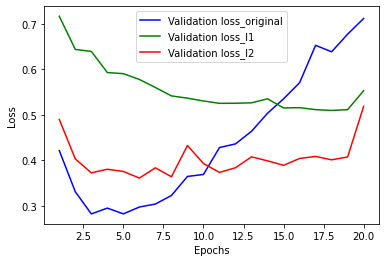

In [ ]:
val_loss_original = history_original.history["val_loss"]
val_loss_l1 = history_l1_reg.history["val_loss"]
val_loss_l2 = history_l2_reg.history["val_loss"]
epochs = range(1, 21)

plt.plot(epochs, val_loss_original, "blue",
         label="Validation loss_original")
plt.plot(epochs, val_loss_l1, "green",
         label="Validation loss_l1")
plt.plot(epochs, val_loss_l2, "red",
         label="Validation loss_l2")

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

l1, l2 regularization을 통해 overfitting을 prevent했음을 확인할 수 있다.

그러나 l1, l2 regularization을 통해 validation loss는 더 증가해 lower performance를 보여주고 있다.

경험적으로 딥러닝에서 l1, l2 regularization을 사용하는 것보다 dropout을 사용하는 것이 better performance를 보여준다.

## Adding dropout
Randomly dropping out (setting to zero) a number of output features of the layer during training

Drop out이 없다면 모델이 heavy node에만 집중해서 높은 weight를 부여할 수도 있다. 이 경우 몇 개의 노드로만 결과를 내므로 좋지 않은 결과를 가져온다.

Keras의 dropout에서는 자동으로 train할 때만 dropout을 적용하고 test할 때는 dropout을 적용하지 않는다.

In [ ]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

history_dropout = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 4s 109ms/step - loss: 0.6425 - accuracy: 0.6247 - val_loss: 0.5451 - val_accuracy: 0.8483
Epoch 2/20
30/30 [==============================] - 1s 21ms/step - loss: 0.5296 - accuracy: 0.7539 - val_loss: 0.4423 - val_accuracy: 0.8669
Epoch 3/20
30/30 [==============================] - 1s 21ms/step - loss: 0.4414 - accuracy: 0.8179 - val_loss: 0.3634 - val_accuracy: 0.8801
Epoch 4/20
30/30 [==============================] - 1s 21ms/step - loss: 0.3722 - accuracy: 0.8560 - val_loss: 0.3137 - val_accuracy: 0.8824
Epoch 5/20
30/30 [==============================] - 1s 22ms/step - loss: 0.3198 - accuracy: 0.8809 - val_loss: 0.2847 - val_accuracy: 0.8889
Epoch 6/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2808 - accuracy: 0.9043 - val_loss: 0.2771 - val_accuracy: 0.8909
Epoch 7/20
30/30 [==============================] - 1s 25ms/step - loss: 0.2476 - accuracy: 0.9194 - val_loss: 0.2767 - val_accuracy: 0.8929
Epoch 8/20
3

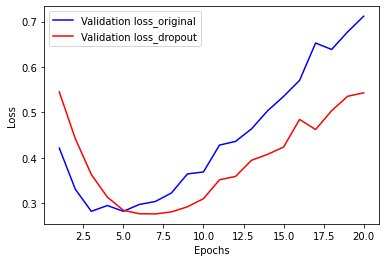

In [ ]:
val_loss_original = history_original.history["val_loss"]
val_loss_dropout = history_dropout.history["val_loss"]
epochs = range(1, 21)

plt.plot(epochs, val_loss_original, "blue",
         label="Validation loss_original")
plt.plot(epochs, val_loss_dropout, "red",
         label="Validation loss_dropout")

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

dropout한 model이 더 좋은 결과를 보여주고 있다.

validation loss가 작으며 overfitting도 늦게 되고 있다.

# Ch6. The universal workflow of machine learning

1. Define a task

2. Develop a model

3. Deploy(배치하다) the model

## 1. Define a task

#### 1. Frame the problem

* What will the input data? What we want to predict?
* What type of machine learning task are you facing?
* What do existing solutions look like?
* Are there particular constraints you will need to deal with?

#### 2. Collect a dataset:
* Inputs and targets are decided, Time for data collection the most arduous(고된), time consuming part of most machine learning projects.

* Beaware of non representative data. It’s critical that the data used for training should be representative of the production data

#### 3. Understand your data
* Before you start training models, you should explore and visualize your data to gain insights about what makes it predictive

#### 4. Choose a measure of success
* Define what you mean by success. Define the evaluation metric and business requirement for the solution

## 2. Develop a model

Prepare the data

Choose an evaluation protocol

Beat a baseline(다른 model에서도 많이 사용되는 유명하고 쉬운 모델)

Scale up: Develop a model that overfits

Regularize and tune your model

## 3. Deploy the model

Explain your work to stakeholders(주주) and set expectations

Ship an inference model

Monitor your model in the wild

Maintain your model

# Ch7. Working with Keras: A deep dive
1. A spectrum of workflows
2. Different ways to build Keras models
3. Using built-in training and evaluation loops
4. Writing your own training and evaluation loops

## 1. A spectrum of workflows
The design of the Keras API: make it easy to get started, yet make it possible to handle high complexity use cases, only requiring incremental learning at each step

Simple use cases should be easy and approachable, and arbitrarily advanced workflows should be possible

## 2. 3 Different ways to build Keras models

Three APIs for building models:

* Sequential model : simple stacks of layers
* Functional API : focuses on graph like model architectures
* Model subclassing : a low level option where you write everything yourself.

## The sequential model

In [ ]:
# model을 만드는 2가지 방법(결과는 동일)

#layer의 list를 만드는 방법
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(10, activation="softmax")
])


#.add를 이용하는 방법
model = keras.Sequential(name = "my_example_model") # model의 이름을 붙여줄 수 있다.
model.add(layers.Dense(64, activation="relu", name = "my_first_layer")) # layer의 이름을 붙여줄 수 있다.
model.add(layers.Dense(10, activation="softmax"))

Sequential model does not have any weights until you actually call it on some data, or call its build() method with an input shape

In [ ]:
model.build(input_shape=(None, 3))
print(len(model.weights)) # 2개의 dense layer, 1개의 layer에는 2개의 weight
print(model.weights)

# weights를 불러오려면 데이터를 불러오거나 build()해야한다.
# 그냥 weights를 불러오면 오류 발생
# data의 input_shape를 정해주지 않으면 weight size를 계산할 수 없기 때문이다.

4
[<tf.Variable 'my_first_layer/kernel:0' shape=(3, 64) dtype=float32, numpy=
array([[-0.21272065,  0.26392627, -0.25496376, -0.09774798,  0.17665488,
        -0.28593454,  0.08608139, -0.2425164 , -0.20228687,  0.05694395,
        -0.1334615 , -0.26475483, -0.29133373,  0.16018704,  0.01695064,
         0.10185322, -0.07131925,  0.11687458, -0.24227539, -0.08386812,
        -0.1811696 ,  0.05446762, -0.12766032, -0.2859822 ,  0.24592662,
        -0.13564959,  0.07928926, -0.25910974, -0.223955  , -0.28712752,
         0.023231  ,  0.12583247, -0.21603802, -0.15053166, -0.06911425,
        -0.27561563, -0.28727758,  0.18741858,  0.133335  , -0.12708175,
         0.19140604, -0.18015018,  0.22559828,  0.09808737, -0.26115748,
         0.03779402,  0.2258538 , -0.27009276, -0.23908088, -0.10693218,
         0.28111553, -0.17373292,  0.03077373,  0.14095014,  0.06655374,
         0.20096272,  0.01328796,  0.04689488, -0.22135776,  0.01131678,
        -0.20107019, -0.2255216 ,  0.29386735,

In [ ]:
# 모델이 build된 후에 summary를 불러올 수 있음
model.summary()

Model: "my_example_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 my_first_layer (Dense)      (None, 64)                256       
                                                                 
 dense_70 (Dense)            (None, 10)                650       
                                                                 
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


256 = 3x64 + 64 

(input shape를 3으로 정해줬으니까, 3x64개의 w1과 64개의 b1 따라서 총 256개의 parameter)

650 = 64x10 + 10

(output shape이 64였으니까 w2는 64x10)

If you'd like to print summary(), declare the shape of the model's inputs in advance

In [ ]:
model = keras.Sequential()
model.add(keras.Input(shape=(3,)))
# summary를 만들기 위해서는 여기서 build한 후 input shape도 정해줘야한다.
model.add(layers.Dense(64, activation="relu"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                256       
                                                                 
Total params: 256
Trainable params: 256
Non-trainable params: 0
_________________________________________________________________


## The Functional API

Sequential model only express models with single input and single output

Functional API provide more power to define general model

### A simple functional model with two Dense layers

In [ ]:
inputs = keras.Input(shape=(3,), name="my_input")
# inputs object holds information about the shape and dtype of the data
# 여기서 inputs는 symbolic tensor

features = layers.Dense(64, activation="relu")(inputs)
# features 또한 new symbolic tensor
# inputs를 dense layer에 넣고 이 dense layer의 output size는 

outputs = layers.Dense(10, activation="softmax")(features)
# outputs 또한 new symbolic tensor


model = keras.Model(inputs=inputs, outputs=outputs)
#After obtaining the final outputs, we instantiated the model by specifying its inputs and outputs in the Model constructor

In [ ]:
inputs.shape

TensorShape([None, 3])

In [ ]:
inputs.dtype

tf.float32

In [ ]:
features.shape

TensorShape([None, 64])

In [ ]:
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 my_input (InputLayer)       [(None, 3)]               0         
                                                                 
 dense_8 (Dense)             (None, 64)                256       
                                                                 
 dense_9 (Dense)             (None, 10)                650       
                                                                 
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


We call such an object(위 코드에서 inputs) a symbolic tensor.

It doesn’t contain any actual data,

but it encodes the specifications of the actual tensors of data that the model will see when you use it.

All Keras layers can be called both on real tensors of data and on these symbolic tensors.

Symbolic tenseor return a new symbolic tensor, with updated shape and dtype information (symbolic tensor가 input이라면 새로운 symbolic tensor를 return한다.)

After obtaining the final outputs, we instantiated the model by specifying its
inputs and outputs in the Model constructor



### Multi input, Multi output model


Most deep learning models look like graphs.

Sequential model로는 만들 수 없다.

#### model

input layer : title, text_body, tags

output layer : priority, department

In [ ]:
vocabulary_size = 10000
num_tags = 100
num_departments = 4

# 3 input layers
title = keras.Input(shape=(vocabulary_size,), name="title")
text_body = keras.Input(shape=(vocabulary_size,), name="text_body")
tags = keras.Input(shape=(num_tags,), name="tags")

features = layers.Concatenate()([title, text_body, tags])
# Concatenate : combine input features into a single tensor, single features

# 1 dense layer
features = layers.Dense(64, activation="relu")(features)

# 2 output layers
priority = layers.Dense(1, activation="sigmoid", name="priority")(features)
department = layers.Dense(num_departments, activation="softmax", name="department")(features)

model = keras.Model(inputs=[title, text_body, tags], outputs=[priority, department])

In [ ]:
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 title (InputLayer)             [(None, 10000)]      0           []                               
                                                                                                  
 text_body (InputLayer)         [(None, 10000)]      0           []                               
                                                                                                  
 tags (InputLayer)              [(None, 100)]        0           []                               
                                                                                                  
 concatenate_1 (Concatenate)    (None, 20100)        0           ['title[0][0]',                  
                                                                  'text_body[0][0]',        

#### training

In [ ]:
num_samples = 1280

# dummy input data
title_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
text_body_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
tags_data = np.random.randint(0, 2, size=(num_samples, num_tags))

# dummy target data
priority_data = np.random.random(size=(num_samples, 1))
department_data = np.random.randint(0, 2, size=(num_samples, num_departments))

model.compile(optimizer="rmsprop",
              loss=["mean_squared_error", "categorical_crossentropy"],
              metrics=[["mean_absolute_error"], ["accuracy"]])
# 2개의 output이 있으므로 2개의 loss fuction이 필요하다

# training
model.fit([title_data, text_body_data, tags_data],
          [priority_data, department_data],
          epochs=1)
# 3개의 training data, 2개의 target data

# evaluation
model.evaluate([title_data, text_body_data, tags_data],
               [priority_data, department_data])

# prediction on new data
priority_preds, department_preds = model.predict([title_data, text_body_data, tags_data])

40/40 [==============================] - 0s 5ms/step - loss: 36.5099 - priority_loss: 0.3399 - department_loss: 36.1700 - priority_mean_absolute_error: 0.5073 - department_accuracy: 0.0594


You can also leverage the names you gave to the input objects and the output layers, and pass data via dictionaries.

변수에 딕셔너리로 저장하고 compile할 때 딕셔너리만 쓰면 되므로 편하다.

In [ ]:
model.compile(optimizer="rmsprop",
              loss={"priority": "mean_squared_error", "department": "categorical_crossentropy"},
              metrics={"priority": ["mean_absolute_error"], "department": ["accuracy"]})

model.fit({"title": title_data, "text_body": text_body_data, "tags": tags_data},
          {"priority": priority_data, "department": department_data},
          epochs=1)

model.evaluate({"title": title_data, "text_body": text_body_data, "tags": tags_data},
               {"priority": priority_data, "department": department_data})

priority_preds, department_preds = model.predict(
    {"title": title_data, "text_body": text_body_data, "tags": tags_data})

40/40 [==============================] - 0s 6ms/step - loss: 15.8500 - priority_loss: 0.3399 - department_loss: 15.5101 - priority_mean_absolute_error: 0.5073 - department_accuracy: 0.1281


### The Power of the functional API: Access to layer connectivity

 
A Functional model is an explicit graph data structure.

This makes it possible to inspect how layers are connected and reuse previous graph nodes as part of new models.

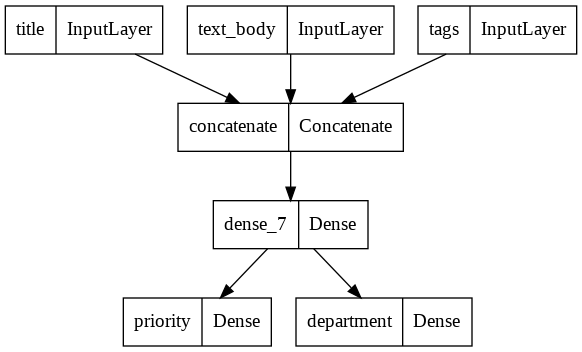

In [ ]:
keras.utils.plot_model(model, "ticket_classifier.png")

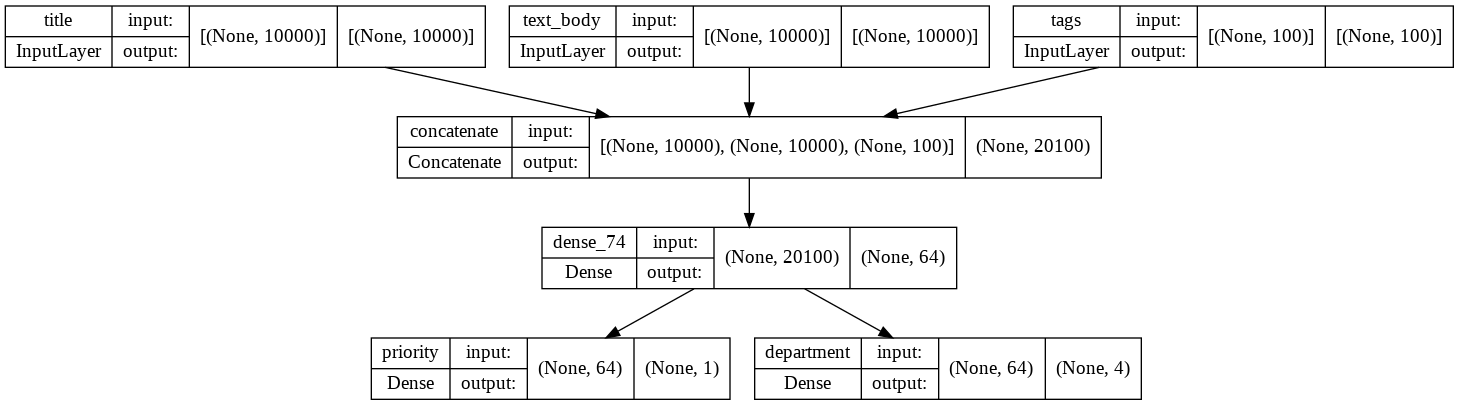

In [ ]:
keras.utils.plot_model(model, "ticket_classifier.png", show_shapes = True)
# show_shapes = True : shape에 관한 정보를 보여줌

Access to layer connectivity also means that you can inspect and reuse individual nodes (layer calls) in the graph.

In [ ]:
model.layers

In [ ]:
# Input of the layer3(=4번째 layer)(=Concatenate layer)
model.layers[3].input

[<KerasTensor: shape=(None, 10000) dtype=float32 (created by layer 'title')>,
 <KerasTensor: shape=(None, 10000) dtype=float32 (created by layer 'text_body')>,
 <KerasTensor: shape=(None, 100) dtype=float32 (created by layer 'tags')>]

In [ ]:
# Output of the layer3(=4번째 layer)(=Concatenate layer)
model.layers[3].output

<KerasTensor: shape=(None, 20100) dtype=float32 (created by layer 'concatenate')>

You can creating a new model by reusing intermediate layer outputs

In [ ]:
features = model.layers[4].output
difficulty = layers.Dense(3, activation="softmax", name="difficulty")(features)

new_model = keras.Model(
    inputs=[title, text_body, tags],
    outputs=[priority, department, difficulty])

### Subclassing the Model class



In the __init __() method, define the layers the model will use

In the call() method, define the forward pass of the model

Instantiate your subclass, and call it on data to create its weights


#### define model

In [ ]:
class CustomerTicketModel(keras.Model):

    def __init__(self, num_departments):
        super().__init__() # super() constructor를 꼭 불러줘야됨
        # define the layers which will use in the forward pass
        self.concat_layer = layers.Concatenate()
        self.mixing_layer = layers.Dense(64, activation="relu")
        self.priority_scorer = layers.Dense(1, activation="sigmoid")
        self.department_classifier = layers.Dense(num_departments, activation="softmax")

    def call(self, inputs):
        title = inputs["title"]
        text_body = inputs["text_body"]
        tags = inputs["tags"]

        features = self.concat_layer([title, text_body, tags])
        features = self.mixing_layer(features)
        priority = self.priority_scorer(features)
        department = self.department_classifier(features)
        return priority, department

#### instantiate model

In [ ]:
model = CustomerTicketModel(num_departments=4)

# input data of dictionary
priority, department = model(
    {"title": title_data, "text_body": text_body_data, "tags": tags_data})

#### compile and train
 
 Sequential or Functional model과 동일하다

In [ ]:
model.compile(optimizer="rmsprop",
              loss=["mean_squared_error", "categorical_crossentropy"],
              metrics=[["mean_absolute_error"], ["accuracy"]])

model.fit({"title": title_data,
           "text_body": text_body_data,
           "tags": tags_data},
          [priority_data, department_data],
          epochs=1)

model.evaluate({"title": title_data,
                "text_body": text_body_data,
                "tags": tags_data},
               [priority_data, department_data])

priority_preds, department_preds = model.predict({"title": title_data,
                                                  "text_body": text_body_data,
                                                  "tags": tags_data})

40/40 [==============================] - 0s 6ms/step - loss: 27.3318 - output_1_loss: 0.3399 - output_2_loss: 26.9919 - output_1_mean_absolute_error: 0.5073 - output_2_accuracy: 0.0922


### Mixing and matching different components

All models in the Keras API can smoothly interoperate with each other,

whether they’re Sequential models, Functional models, or Subclassed models

In [ ]:
# Functional model that includes a Subclassed model


#subclassed model
class Classifier(keras.Model):

    def __init__(self, num_classes=2):
        super().__init__()
        if num_classes == 2:
            num_units = 1
            activation = "sigmoid"
        else:
            num_units = num_classes
            activation = "softmax"
        self.dense = layers.Dense(num_units, activation=activation)

    def call(self, inputs):
        return self.dense(inputs)

    
inputs = keras.Input(shape=(3,))
features = layers.Dense(64, activation="relu")(inputs)
outputs = Classifier(num_classes=10)(features) # include subclassed model in the functional model
model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
# Functional model as part of a subclassed layer or model


inputs = keras.Input(shape=(64,))
outputs = layers.Dense(1, activation="sigmoid")(inputs)
binary_classifier = keras.Model(inputs=inputs, outputs=outputs) # functional model


# Subclassed model
class MyModel(keras.Model):

    def __init__(self, num_classes=2):
        super().__init__()
        self.dense = layers.Dense(64, activation="relu")
        self.classifier = binary_classifier # functional model in the subclassed model

    def call(self, inputs):
        features = self.dense(inputs)
        return self.classifier(features)

model = MyModel()

## 3. Using built-in training and evaluation loops

### The standard workflow: compile(), fit(), evaluate(), predict()

In [ ]:
from tensorflow.keras.datasets import mnist

# create the model by Functional API
def get_mnist_model():
    inputs = keras.Input(shape=(28 * 28,))
    features = layers.Dense(512, activation="relu")(inputs)
    features = layers.Dropout(0.5)(features)
    outputs = layers.Dense(10, activation="softmax")(features)
    model = keras.Model(inputs, outputs)
    return model


# load data
(images, labels), (test_images, test_labels) = mnist.load_data()
images = images.reshape((60000, 28 * 28)).astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28)).astype("float32") / 255
train_images, val_images = images[10000:], images[:10000]
train_labels, val_labels = labels[10000:], labels[:10000]


model = get_mnist_model()


model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])


# built in training
model.fit(train_images, train_labels,
          epochs=3,
          validation_data=(val_images, val_labels))

# evaluation loops
test_metrics = model.evaluate(test_images, test_labels)


predictions = model.predict(test_images)

Epoch 1/3
1563/1563 [==============================] - 8s 5ms/step - loss: 0.2993 - accuracy: 0.9111 - val_loss: 0.1529 - val_accuracy: 0.9563
Epoch 2/3
1563/1563 [==============================] - 7s 4ms/step - loss: 0.1675 - accuracy: 0.9533 - val_loss: 0.1306 - val_accuracy: 0.9649
Epoch 3/3
313/313 [==============================] - 1s 3ms/step - loss: 0.1140 - accuracy: 0.9700


### Writing your own metrics

### Implementing a custom metric by subclassing the Metric class

A Keras metric is a subclass of the keras.metrics.Metric class

Write the state update logic, which happens in the update_state () method.

In [ ]:
class RootMeanSquaredError(keras.metrics.Metric):

    def __init__(self, name="rmse", **kwargs):
        super().__init__(name=name, **kwargs)
        # parameters that you are going to monitor : mse_sum and total_samples
        self.mse_sum = self.add_weight(name="mse_sum", initializer="zeros")
        self.total_samples = self.add_weight(name="total_samples", initializer="zeros", dtype="int32")

    # update rule of the weight paramaters    
    def update_state(self, y_true, y_pred, sample_weight=None):
        y_true = tf.one_hot(y_true, depth=tf.shape(y_pred)[1])
        mse = tf.reduce_sum(tf.square(y_true - y_pred))
        self.mse_sum.assign_add(mse)
        num_samples = tf.shape(y_pred)[0]
        self.total_samples.assign_add(num_samples)

    
    # return current metric
    def result(self):
        return tf.sqrt(self.mse_sum / tf.cast(self.total_samples, tf.float32))

    
    # reset for each epoch
    def reset_state(self):
        self.mse_sum.assign(0.)
        self.total_samples.assign(0)

### Custom metrics can be used just like built in ones

In [ ]:
model = get_mnist_model()

model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy", RootMeanSquaredError()]) # Using custom metrics

model.fit(train_images, train_labels,
          epochs=3,
          validation_data=(val_images, val_labels))

test_metrics = model.evaluate(test_images, test_labels)

Epoch 1/3
1563/1563 [==============================] - 8s 5ms/step - loss: 0.2992 - accuracy: 0.9114 - rmse: 7.1809 - val_loss: 0.1611 - val_accuracy: 0.9532 - val_rmse: 7.3573
Epoch 2/3
1563/1563 [==============================] - 7s 4ms/step - loss: 0.1666 - accuracy: 0.9533 - rmse: 7.3553 - val_loss: 0.1255 - val_accuracy: 0.9647 - val_rmse: 7.3944
Epoch 3/3
313/313 [==============================] - 1s 3ms/step - loss: 0.1065 - accuracy: 0.9728 - rmse: 7.4345


### Using callbacks

Launching a training run on a large dataset for tens of epochs using model.fit () can be a bit like launching a paper airplane: you don’t have any control over its
trajectory or its landing spot.

A callback is an object (a class instance implementing specific methods) that is
passed to the model in the call to fit()

It has access to all the available data about the state of the model and its
performance, and it can take action: interrupt training, save a model,
load a different weight set, or otherwise alter the state of the model.

### callback의 종류


Model checkpointing

    Saving the current state of the model at different points during training.
    * keras.callbacks.ModelCheckpoint

Early stopping

    Interrupting training when the validation loss is no longer improving (saving the best model obtained during training).
    * keras.callbacks.EarlyStopping

Dynamically adjusting the value of certain parameters during training. Such as the learning rate of the optimizer.

    * keras.callbacks.LearningRateScheduler
    * keras.callbacks.ReduceLROnPlateau


Logging training and validation metrics during training, or visualizing the
representations learned by the model as they’re updated.

    * keras.callbacks.CSVLogger

### EarlyStopping & ModelCheckpoint


EarlyStopping : Interrupts training once a target metric being
monitored has stopped improving for a fixed number of epochs

ModelCheckpoint : Lets you continually save the model during training

In [ ]:
callbacks_list = [
    
    keras.callbacks.EarlyStopping(
        monitor="val_accuracy",
        patience=2, # val_accuracy가 2 epoch동안 증가하지 않으면 interrupt한다.
    ),
    
    keras.callbacks.ModelCheckpoint(
        filepath="checkpoint_path.keras", # to save the model
        monitor="val_loss",
        save_best_only=True, # save only best one, True로 지정하지 않으면 모든 결과를 볼 수 있다.
    )
]


model = get_mnist_model()

model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

model.fit(train_images, train_labels,
          epochs=10,
          callbacks=callbacks_list, # fit할 때 위에서 정한 callbacks를 넣는다.
          validation_data=(val_images, val_labels))

Epoch 1/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.2931 - accuracy: 0.9134 - val_loss: 0.1556 - val_accuracy: 0.9550
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1619 - accuracy: 0.9535 - val_loss: 0.1285 - val_accuracy: 0.9653
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1392 - accuracy: 0.9622 - val_loss: 0.1219 - val_accuracy: 0.9677
Epoch 4/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.1310 - accuracy: 0.9666 - val_loss: 0.1126 - val_accuracy: 0.9730
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1198 - accuracy: 0.9701 - val_loss: 0.1109 - val_accuracy: 0.9743
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1134 - accuracy: 0.9731 - val_loss: 0.1121 - val_accuracy: 0.9758
Epoch 7/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.1079 - accuracy: 0.9746 - val_loss: 0.1100 - val_accuracy:

In [ ]:
model = keras.models.load_model("checkpoint_path.keras")  

### Writing your own callbacks

Simple example that saves a list of per
batch loss values during training and
saves a graph of these values at the
end of each epoch.

In [ ]:
class LossHistory(keras.callbacks.Callback):
    
    def on_train_begin(self, logs):
        self.per_batch_losses = []

    def on_batch_end(self, batch, logs):
        self.per_batch_losses.append(logs.get("loss"))

    def on_epoch_end(self, epoch, logs):
        plt.clf()
        plt.plot(range(len(self.per_batch_losses)), self.per_batch_losses,
                 label="Training loss for each batch")
        plt.xlabel(f"Batch (epoch {epoch})")
        plt.ylabel("Loss")
        plt.legend()
        plt.savefig(f"plot_at_epoch_{epoch}")
        self.per_batch_losses = []

Epoch 1/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.2938 - accuracy: 0.9130 - val_loss: 0.1599 - val_accuracy: 0.9536
Epoch 2/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.1637 - accuracy: 0.9549 - val_loss: 0.1294 - val_accuracy: 0.9651
Epoch 3/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.1378 - accuracy: 0.9626 - val_loss: 0.1152 - val_accuracy: 0.9713
Epoch 4/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.1235 - accuracy: 0.9673 - val_loss: 0.1114 - val_accuracy: 0.9725
Epoch 5/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.1181 - accuracy: 0.9713 - val_loss: 0.1131 - val_accuracy: 0.9735
Epoch 6/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.1115 - accuracy: 0.9730 - val_loss: 0.1050 - val_accuracy: 0.9767
Epoch 7/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.1069 - accuracy: 0.9746 - val_loss: 0.1081 - val_accuracy:

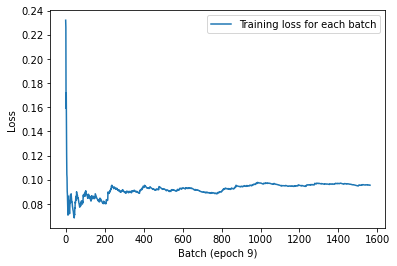

In [ ]:
model = get_mnist_model()

model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

model.fit(train_images, train_labels,
          epochs=10,
          callbacks=[LossHistory()],
          validation_data=(val_images, val_labels))

In [ ]:
import os
os.listdir()

['.config',
 'plot_at_epoch_4.png',
 'plot_at_epoch_8.png',
 'plot_at_epoch_1.png',
 'plot_at_epoch_5.png',
 'plot_at_epoch_0.png',
 'plot_at_epoch_9.png',
 'plot_at_epoch_2.png',
 'plot_at_epoch_6.png',
 'plot_at_epoch_7.png',
 'plot_at_epoch_3.png',
 'ticket_classifier.png',
 'checkpoint_path.keras',
 'sample_data']

# Ch8. Introduction to deep learning for computer vision

1. Introduction to
convnets

2. Training a
convnet from scratch on a small dataset

3. Leveraging a
pretrained model

## 1. Introduction to convnets

Stack of Conv2D and MaxPooling2D layers

In [ ]:
# Instantiating a small convnet

from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(28, 28, 1))                                     # MNIST dataset을 이용하기 위해 28*28 사용
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)     # Conv2D
x = layers.MaxPooling2D(pool_size=2)(x)                                     # MaxPooling2D
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)                                                     # Flatten all the information
outputs = layers.Dense(10, activation="softmax")(x)                         # connect Dense layer

model = keras.Model(inputs=inputs, outputs=outputs)                         # making model by functional API

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856 

In [ ]:
# Training the convnet on MNIST images

from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1)) # CNN을 이용하기 위해서 channel dimension은 필수적이다.
# Convnet is running on the original shape of the image.
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype("float32") / 255

model.compile(optimizer="rmsprop",
    loss="sparse_categorical_crossentropy", # multi class classification
    metrics=["accuracy"])

model.fit(train_images, train_labels, epochs=5, batch_size=64)

11501568/11490434 [==============================] - 0s 0us/step
Epoch 1/5
938/938 [==============================] - 23s 7ms/step - loss: 0.1525 - accuracy: 0.9522
Epoch 2/5
938/938 [==============================] - 6s 6ms/step - loss: 0.0440 - accuracy: 0.9863
Epoch 3/5
938/938 [==============================] - 6s 6ms/step - loss: 0.0309 - accuracy: 0.9909
Epoch 4/5
938/938 [==============================] - 6s 6ms/step - loss: 0.0232 - accuracy: 0.9931
Epoch 5/5
938/938 [==============================] - 6s 6ms/step - loss: 0.0175 - accuracy: 0.9948


In [ ]:
# Evaluating the convnet

test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc:.3f}")

313/313 [==============================] - 1s 3ms/step - loss: 0.0324 - accuracy: 0.9910
Test accuracy: 0.991


### The convolution operation

* 'Dense layers' learn 'global patterns' in their input feature space whereas 'convolution layers' learn 'local patterns'

* The patterns they learn are
translation invariant

* They can learn spatial hierarchies of patterns

* Convolution preserves the spatial relationship between pixels by learning image
features using small squares (depending on the filter size) of input data

* Convolution: multiplying elementwise by filter and summing the multiplication
outputs

* Ex) a 3x3 kernel or 3x3x1 filter acts on a 5x6 input image with stride 1 and outputs
a 3x4 feature map.

* In fully connected sense, we need unshared 30(=5x6)x12(=3x4) weights (input size x output size)

* 9 vs 360. So using convolution filter is far more efficient.

Convolution on MxNx3 image with 3x3x3 filter producing 1 feature map by taking dot products between the filter and 3x3x3 piecies of the image.

Depth part is decided based on the input feature map.

### Why convolution?

* Fully Connected -> 1000x1000 images, 10000 hidden nodes, 10^10 parameters
* Convolution     -> 1000x1000 images, 10x10 filter size, 100 filters, 10^4 parameters

* If you are dealing with image dataset, it's highly recommend to use convolution layers in modeling.



### How convolution filter works?

Different values of the filter matrix produce different
feature maps for the same input image.

CNN learns the values of filters during training

The more filters, the more features are extracted

### Feature map


4 parameters of feature map

1. filter size
2. depth
3. stride
4. zero-padding

### The max pooling operation


Role
of max pooling: to aggressively downsample feature maps

Transformed via a hardcoded max
tensor operation

We need the features from the last
convolution layer to contain
information about the totality of the
input

The final feature map has 22
× 22 ×
128 = 61,952 total coefficients per
sample

This is far too large for such a
small model and would result in
intense overfitting

In [ ]:
# max-pooling이 없는 경우
inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation="softmax")(x)
model_no_max_pool = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model_no_max_pool.summary()
# 모델의 크기에 비해 parameters가 너무 많다.

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 22, 22, 128)       73856     
                                                                 
 flatten (Flatten)           (None, 61952)             0         
                                                                 
 dense (Dense)               (None, 10)                619530    
                                                                 
Total params: 712,202
Trainable params: 712,202
Non-trainable

In [ ]:
# max-pooling은 없지만 stride를 2로 지정한 경우
inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(filters=32, kernel_size=3, strides = 2, activation="relu")(inputs) # stride = 2 로 지정.
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation="softmax")(x)
model_no_max_pool = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model_no_max_pool.summary()
# parameters가 많이 줄어들었으나 max-pooling의 결과가 더 좋다.
# 일반적으로 classification에서는 stride보다 max-pooling을 자주 사용한다.
# 경험적으로 대부분 average-pooling보다 max-poolng이 좋다.

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 32)        320       
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 conv2d_5 (Conv2D)           (None, 9, 9, 128)         73856     
                                                                 
 flatten_1 (Flatten)         (None, 10368)             0         
                                                                 
 dense_1 (Dense)             (None, 10)                103690    
                                                                 
Total params: 196,362
Trainable params: 196,362
Non-trainab

## 2. Training a convnet from scratch on a small dataset

Downloading a
Kaggle dataset in Google Colaboratory

Access to the API is restricted to
Kaggle users, you need to authenticate yourself.

The
kaggle package will look for your login credentials in a JSON file located at
kaggle kaggle.json

First, you need to create a
Kaggle API key and download it to your local machine
Login
--> My Account --> Account settings --> API
Click the Create New API Token
button


Second, go to your
Colab notebook, and upload the API’s key JSON file to your
Colab session by running the following code in a notebook cell:

### 데이터 불러오기

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"junwonj","key":"c74d93446e15bc9e99e58944026754ba"}'}

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!kaggle competitions download -c dogs-vs-cats

dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import os
os.listdir()

['.config', 'kaggle.json', 'dogs-vs-cats.zip', 'sample_data']

In [ ]:
!unzip -qq dogs-vs-cats.zip

replace sampleSubmission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
os.listdir()

['.config',
 'kaggle.json',
 'sampleSubmission.csv',
 'train.zip',
 'dogs-vs-cats.zip',
 'test1.zip',
 'sample_data']

In [ ]:
!unzip -qq train.zip

replace train/cat.0.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
os.listdir()

['.config',
 'cats_vs_dogs_small',
 'kaggle.json',
 'convnet_from_scratch.keras',
 'sampleSubmission.csv',
 'train.zip',
 'dogs-vs-cats.zip',
 'train',
 'test1.zip',
 'sample_data']

In [ ]:
os.listdir('train')

['cat.8504.jpg',
 'cat.11631.jpg',
 'cat.2293.jpg',
 'dog.10835.jpg',
 'cat.1794.jpg',
 'dog.8026.jpg',
 'cat.5056.jpg',
 'dog.11509.jpg',
 'dog.9857.jpg',
 'dog.8603.jpg',
 'dog.671.jpg',
 'cat.5586.jpg',
 'dog.6119.jpg',
 'cat.10012.jpg',
 'dog.8139.jpg',
 'dog.9960.jpg',
 'cat.5470.jpg',
 'dog.2409.jpg',
 'cat.10842.jpg',
 'cat.6680.jpg',
 'dog.4186.jpg',
 'dog.3691.jpg',
 'cat.1445.jpg',
 'dog.9279.jpg',
 'cat.8431.jpg',
 'dog.5463.jpg',
 'cat.5134.jpg',
 'dog.8426.jpg',
 'cat.11676.jpg',
 'cat.3808.jpg',
 'cat.2622.jpg',
 'dog.8836.jpg',
 'dog.4763.jpg',
 'dog.6824.jpg',
 'cat.3029.jpg',
 'dog.5938.jpg',
 'cat.1482.jpg',
 'cat.10450.jpg',
 'dog.444.jpg',
 'dog.12390.jpg',
 'dog.10378.jpg',
 'dog.11684.jpg',
 'dog.8118.jpg',
 'dog.10184.jpg',
 'dog.5112.jpg',
 'cat.7748.jpg',
 'dog.3288.jpg',
 'cat.748.jpg',
 'cat.4541.jpg',
 'cat.2146.jpg',
 'dog.12476.jpg',
 'cat.6503.jpg',
 'cat.3856.jpg',
 'cat.11998.jpg',
 'cat.9576.jpg',
 'cat.8632.jpg',
 'cat.8509.jpg',
 'dog.11323.jpg',
 'c

### Copying images to training, validation, and test directories

복잡하게 나열되어있는 data를 train, validation, test로 나누고 각각 1000개, 500개, 1000개의 data를 넣는 전처리

In [ ]:
import os, shutil, pathlib

original_dir = pathlib.Path("train")
# original dataset이 풀려있는 directory
new_base_dir = pathlib.Path("cats_vs_dogs_small")
# smaller dataset을 저장할 directory

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        # 새로운 directory 만들기 ex) cats_vs_dogs_small/train/dog
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        # 파일 이름 만들기
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)
            # src : source, dst : destination

make_subset("train", start_index=0, end_index=1000)
# 처음 1000개로 train set을 만듦
make_subset("validation", start_index=1000, end_index=1500)
# 그 다음 500개로 validation set을 만듦
make_subset("test", start_index=1500, end_index=2500)
# 그 다음 1000개로 test set을 만듦

FileExistsError: ignored

In [ ]:
os.listdir(new_base_dir)

['test', 'validation', 'train']

In [ ]:
# 위 코드와 동일
os.listdir('cats_vs_dogs_small')

['test', 'validation', 'train']

In [ ]:
os.listdir('cats_vs_dogs_small/test')

['dog', 'cat']

In [ ]:
os.listdir('cats_vs_dogs_small/test/dog')
# 1500~2500 index를 가진 dog 파일이 들어가있음

['dog.2409.jpg',
 'dog.2459.jpg',
 'dog.2037.jpg',
 'dog.1715.jpg',
 'dog.1528.jpg',
 'dog.2481.jpg',
 'dog.2469.jpg',
 'dog.2046.jpg',
 'dog.2051.jpg',
 'dog.2426.jpg',
 'dog.2166.jpg',
 'dog.1516.jpg',
 'dog.1676.jpg',
 'dog.1950.jpg',
 'dog.1936.jpg',
 'dog.2288.jpg',
 'dog.1626.jpg',
 'dog.1853.jpg',
 'dog.2340.jpg',
 'dog.1518.jpg',
 'dog.1893.jpg',
 'dog.1589.jpg',
 'dog.2036.jpg',
 'dog.1643.jpg',
 'dog.2061.jpg',
 'dog.1591.jpg',
 'dog.2424.jpg',
 'dog.1625.jpg',
 'dog.2191.jpg',
 'dog.2074.jpg',
 'dog.2436.jpg',
 'dog.1955.jpg',
 'dog.2280.jpg',
 'dog.1569.jpg',
 'dog.1793.jpg',
 'dog.1938.jpg',
 'dog.2437.jpg',
 'dog.2086.jpg',
 'dog.1615.jpg',
 'dog.1520.jpg',
 'dog.1575.jpg',
 'dog.1972.jpg',
 'dog.1587.jpg',
 'dog.2093.jpg',
 'dog.1737.jpg',
 'dog.1966.jpg',
 'dog.2461.jpg',
 'dog.1779.jpg',
 'dog.2165.jpg',
 'dog.1657.jpg',
 'dog.2239.jpg',
 'dog.1792.jpg',
 'dog.2097.jpg',
 'dog.2152.jpg',
 'dog.2195.jpg',
 'dog.2015.jpg',
 'dog.2047.jpg',
 'dog.1603.jpg',
 'dog.1613.jpg

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(180, 180, 3))
# 180x180 size를 가진 RGB image
x = layers.Rescaling(1./255)(inputs)
# rescale
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
# binary classification이라 activation은 sigmoid
model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.summary()

# height, width는 점점 작아지고 depth는 점점 깊어진다.

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                         

In [ ]:
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

### Data preprocessing

1. Read the picture files.
2. Decode the JPEG content to RGB grids of pixels
3. Convert these into floating
point tensors
4. Resize them to a shared size (we’ll use 180
× 180)
5. Pack them into batches (we’ll use batches of 32 images)

In [ ]:
# Using image_dataset_from_directory to read images

from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

### Example

#### Understanding TensorFlow Dataset objects



TensorFlow
makes available the tf.data API to create efficient input pipelines

The Dataset class handles many key features that would otherwise be
cumbersome to implement yourself in particular, asynchronous data prefetching

The Dataset class also exposes a functional
style API for modifying datasets

In [ ]:
import numpy as np
import tensorflow as tf
random_numbers = np.random.normal(size=(1000, 16))
dataset = tf.data.Dataset.from_tensor_slices(random_numbers)
# from_tensor_slices() class can be used to create a Dataset from a NumPy array

In [ ]:
# Yielding single samples

for i, element in enumerate(dataset):
    print(element.shape)
    if i >= 2:
        break

(16,)
(16,)
(16,)


In [ ]:
# We can use .batch() method to batch the data

batched_dataset = dataset.batch(32)
for i, element in enumerate(batched_dataset):
    print(element.shape)
    if i >= 2:
        break

(32, 16)
(32, 16)
(32, 16)


#### Range of useful dataset methods

* .shuffle(buffer_size) : Shuffles elements within a buffer
* .prefetch (buffer_size) : Prefetches a buffer of elements in GPU memory to achieve
better device utilization.
* .map(callable) : Applies an arbitrary transformation to each element of the dataset

In [ ]:
reshaped_dataset = dataset.map(lambda x: tf.reshape(x, (4, 4)))
for i, element in enumerate(reshaped_dataset):
    print(element.shape)
    if i >= 2:
        break

(4, 4)
(4, 4)
(4, 4)


In [ ]:
reshaped_dataset = dataset.map(lambda x: tf.reshape(x, (4, 4))).batch(32)
for i, element in enumerate(reshaped_dataset):
    print(element.shape)
    if i >= 2:
        break

(32, 4, 4)
(32, 4, 4)
(32, 4, 4)


### 다시 원래 문제로 돌아가자

In [ ]:
# Displaying the shapes of the data and labels yielded by the Dataset

for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


In [ ]:
# Fitting the model using a Dataset

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 23s 102ms/step - loss: 0.7387 - accuracy: 0.5165 - val_loss: 1.7306 - val_accuracy: 0.5000
Epoch 2/30
63/63 [==============================] - 6s 92ms/step - loss: 0.7143 - accuracy: 0.5505 - val_loss: 0.6836 - val_accuracy: 0.5450
Epoch 3/30
63/63 [==============================] - 8s 131ms/step - loss: 0.6747 - accuracy: 0.6010 - val_loss: 0.6712 - val_accuracy: 0.5950
Epoch 4/30
63/63 [==============================] - 9s 127ms/step - loss: 0.6263 - accuracy: 0.6500 - val_loss: 0.6374 - val_accuracy: 0.6610
Epoch 5/30
63/63 [==============================] - 7s 98ms/step - loss: 0.5910 - accuracy: 0.6755 - val_loss: 0.8863 - val_accuracy: 0.5370
Epoch 6/30
63/63 [==============================] - 5s 70ms/step - loss: 0.5592 - accuracy: 0.7240 - val_loss: 0.6219 - val_accuracy: 0.6490
Epoch 7/30
63/63 [==============================] - 5s 69ms/step - loss: 0.5163 - accuracy: 0.7515 - val_loss: 0.6360 - val_accuracy: 0.6490
Epoch 8/3

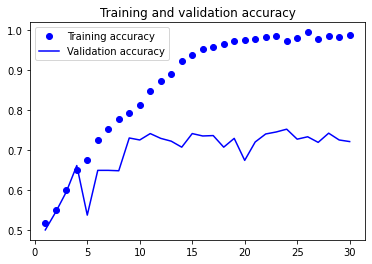

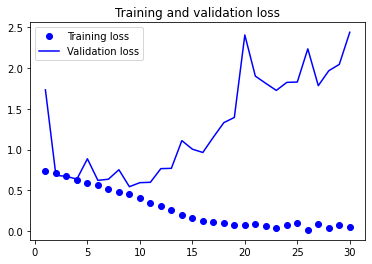

In [ ]:
# Displaying curves of loss and accuracy during training

import matplotlib.pyplot as plt

accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [ ]:
# Evaluating the model on the test set
# sample이 2000개로 너무 적어 overfitting이 나타날 것이다.

test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 3s 37ms/step - loss: 0.6044 - accuracy: 0.6965
Test accuracy: 0.697


### Using data augmentation to prevent overfitting

* **Data augmentation**
takes the approach of generating more training data
from existing training samples by **augmenting the samples via a number of random transformations**
that yield believable looking images

* In
Keras , this can be done by adding a number of data augmentation layers at
the start of your model.

In [ ]:
# 모델에 다음과 같이 data_augmentation을 삽입할 수 있다.

data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

**RandomFlip**("horizontal")
is for randomly flipping half the images horizontally

**RandomRotation**(0.1)
Rotates the input images by a random value in the range [ -10%, +10%]

**RandomZoom**(0.2)
Zooms in or out of the image by a random factor in the range [ -20%, +20%]

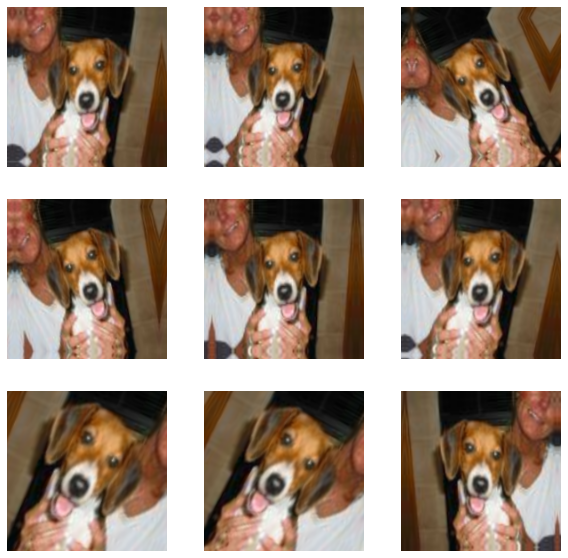

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
# We can use .take(N) to only sample N batches from the dataset. This is equivalent to inserting a break in the loop after the Nth batch
    for i in range(9):
        augmented_images = data_augmentation(images)
        # apply the augmentation
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        # Display the first image in the output batch.
        # For each of the 9 iteration, this is a different augmentation of the same image
        plt.axis("off")

# augmentation을 통해 dataset이 많아지면 overfitting을 prevent할 수 있다.

### Defining a new convnet

In [ ]:
# New convnet includes Image augmentation and dropout

inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs) # augmentation
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x) # dropout
# dropout을 convolution layer에 사용하는 것은 좋지 않다.
# 일반적인 Dropout은 convolution layer에 사용하지 않는다.
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [ ]:
# Training the regularized convnet

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]

history = model.fit(
    train_dataset,
    epochs=100,
    validation_data=validation_dataset,
    callbacks=callbacks)

NameError: ignored

In [ ]:
# Evaluating the model on the test set

test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")
# dropout과 augmentation이 없는 것보다 결과가 훨씬 좋다.

## 8.3. Leveraging a pretrained model

* A common and highly effective approach to deep learning on small image datasets
is to use a pretrained model

* **Pretrained network** is a saved network that was previously trained on a large
dataset

* Motivations:

    Lots of data, time, resources needed to train and tune a neural network from
scratch

    Cheaper, faster way of adapting a neural network by exploiting their
generalization properties

1. Take top performing pre-trained networks(convolutional base)
2. If we have small amount of data

    Freeze all Networks + New softmax layer for cats and dogs

    Training에 New softmax layer for cats and dogs만 사용한다.

3. If we have larger data

    Freeze some Networks + New softmax layer for cats and dogs

    Training에 top performing pre-trained networks의 일부도 사용한다.

* List of image classification models (all pretrained on the ImageNet dataset) that are available as part of keras : Xception
, Inception V3, ResNet50, VGG16, VGG19, MobileNet

* More available from
tensorflow hub

In [ ]:
# Instantiating the VGG16 convolutional base

conv_base = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False, # classifier part는 제외하고 convolutional base만 가져온다.
    input_shape=(180, 180, 3))

In [ ]:
conv_base.summary()

### Fast feature extraction without data augmentation

We’ll start by extracting features as
NumPy arrays by calling the predict()
method of the conv_base model on our training

In [ ]:
# Extracting the VGG16 features and corresponding labels

def get_features_and_labels(dataset):
    all_features = []
    all_labels = []
    for images, labels in dataset:
        preprocessed_images = keras.applications.vgg16.preprocess_input(images)
        # vgg16 pretrained network
        features = conv_base.predict(preprocessed_images)
        all_features.append(features)
        all_labels.append(labels)
    return np.concatenate(all_features), np.concatenate(all_labels)

train_features, train_labels =  get_features_and_labels(train_dataset)
val_features, val_labels =  get_features_and_labels(validation_dataset)
test_features, test_labels =  get_features_and_labels(test_dataset)

In [ ]:
train_features.shape

In [ ]:
# Defining and training the densely connected classifier
# add last layer
# training is very fast because we only have to deal with two dense layers

inputs = keras.Input(shape=(5, 5, 512))
x = layers.Flatten()(inputs)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
      filepath="feature_extraction.keras",
      save_best_only=True,
      monitor="val_loss")
]
history = model.fit(
    train_features, train_labels,
    epochs=20,
    validation_data=(val_features, val_labels),
    callbacks=callbacks)

In [ ]:
import matplotlib.pyplot as plt
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

# 2 dense layer만 사용했음에도 불구하고 결과가 좋다.

### Fast feature extraction with data augmentation

Create a new model that chains together: 

1) data augmentation

2) freezing convolutional base

3) a dense classifier

In [ ]:
# Instantiating and freezing the VGG16 convolutional base

conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False) # only get convolutional base part
conv_base.trainable = False # conv_base는 이미 잘 훈련되어있는거라 훈련시키지 않는다.

Printing the list of trainable weights before and after freezing

In [ ]:
conv_base.trainable = True
print("This is the number of trainable weights "
      "before freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights before freezing the conv base: 26


In [ ]:
conv_base.trainable = False
print("This is the number of trainable weights "
      "after freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights after freezing the conv base: 0


In [ ]:
# Adding a data augmentation stage and a classifier to the convolutional base

data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs) # apply data augmentation
x = keras.applications.vgg16.preprocess_input(x) # apply input value scaling
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="feature_extraction_with_data_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]

history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/50
31/63 [=============>................] - ETA: 6:37 - loss: 32.7341 - accuracy: 0.8609

In [ ]:
# Evaluating the model on the test set

test_model = keras.models.load_model(
    "feature_extraction_with_data_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

# 이전보다 결과가 아주 조금 좋아졌다.

### Fine tuning a pretrained model

Fine
tuning consists of unfreezing a few of the top
layers of a frozen model base used for feature
extraction, and jointly training both the newly added
part of the model

last convolution block을 unfreeze하고 같이 훈련시키다.

#### step

1. Add your custom network on top of an already
trained base network
2. Freeze the base network
3. Train the part you added
4. Unfreeze some layers in the base network
5. Jointly train both these layers and the part you added

In [ ]:
# Freezing all layers until the fourth from the last

conv_base.trainable = True
for layer in conv_base.layers[:-4]:
    layer.trainable = False

In [ ]:
model.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
              # we use smaller lr
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="fine_tuning.keras",
        save_best_only=True,
        monitor="val_loss")
]

history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

In [ ]:
model = keras.models.load_model("fine_tuning.keras")
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

# many times it will improve the results

1. Convnets
are the best type of machine learning models for
computer vision
2. On a small dataset, overfitting will be the main issue. Data
augmentation is a powerful way
3. It’s easy to reuse an existing
convnet on a new dataset via
transfer learning
4. As a complement to feature extraction, you can use fine
tuning